# Séries Temporais

## Aula 01: Coleta de dados e primeiras análises

Os dados foram extraídos do site https://www.seade.gov.br/coronavirus/, mas foram disponibilizados para os alunos em https://github.com/alura-cursos/Prophet_covid/tree/main

<b>Foi utilizado o Anaconda Jupyter por causa do uso da biblioteca prophet.<b>

Bibliotecas

In [390]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import autocorrelation_plot

In [391]:
#Para ignorar os avisos do pandas
warnings.filterwarnings('ignore') 

Leitura dos dados

In [392]:
#Dados no github
url = "https://github.com/cmattosr/bootcampDS_Mod03/raw/main/dados/dados_covid_sp.zip"
dados = pd.read_csv(url, sep=";")
dados

nome_munic  codigo_ibge  dia  mes    datahora  casos  \
0             Adamantina      3500105   25    2  2020-02-25      0   
1                 Adolfo      3500204   25    2  2020-02-25      0   
2                  Aguaí      3500303   25    2  2020-02-25      0   
3         Águas da Prata      3500402   25    2  2020-02-25      0   
4       Águas de Lindóia      3500501   25    2  2020-02-25      0   
...                  ...          ...  ...  ...         ...    ...   
286173          Ignorado      9999999    8    5  2021-05-08    820   
286174          Ignorado      9999999    9    5  2021-05-09    756   
286175          Ignorado      9999999   10    5  2021-05-10    703   
286176          Ignorado      9999999   11    5  2021-05-11    744   
286177          Ignorado      9999999   12    5  2021-05-12    709   

        casos_novos      casos_pc    casos_mm7d  obitos  ...  \
0                 0  0,000000e+00     0,0000000       0  ...   
1                 0  0,000000e+00     0,0000000       0  ...   
2                 0  0,000000e+00     0,0000000       0  ...   
3                 0  0,000000e+00     0,0000000       0  ...   
4                 0  0,000000e+00     0,0000000       0  ...   
...             ...           ...           ...     ...  ...   
286173          116  0,000000e+00    10,0000000       5  ...   
286174          -64  0,000000e+00     7,8571429      16  ...   
286175          -53  0,000000e+00     3,8571429       9  ...   
286176           41  0,000000e+00     4,4285714       3  ...   
286177          -35  0,000000e+00    -4,1428571       0  ...   

                     nome_drs cod_drs    pop pop_60   area  map_leg map_leg_s  \
0                     Marília       5  33894   7398  41199        0       8.0   
1       São José do Rio Preto      15   3447    761  21106        0       8.0   
2       São João da Boa Vista      14  35608   5245  47455        0       8.0   
3       São João da Boa Vista      14   7797   1729  14267        0       8.0   
4                    Campinas       3  18374   3275   6013        0       8.0   
...                       ...     ...    ...    ...    ...      ...       ...   
286173                    NaN       0      0      0      0      NaN       NaN   
286174                    NaN       0      0      0      0      NaN       NaN   
286175                    NaN       0      0      0      0      NaN       NaN   
286176                    NaN       0      0      0      0      NaN       NaN   
286177                    NaN       0      0      0      0      NaN       NaN   

        latitude  longitude  semana_epidem  
0       -21,6820   -51,0737              9  
1       -21,2325   -49,6451              9  
2       -22,0572   -46,9735              9  
3       -21,9319   -46,7176              9  
4       -22,4733   -46,6314              9  
...          ...        ...            ...  
286173    0,0000     0,0000             18  
286174    0,0000     0,0000             19  
286175    0,0000     0,0000             19  
286176    0,0000     0,0000             19  
286177    0,0000     0,0000             19  

[286178 rows x 26 columns]

In [393]:
#mudando o campo "datahora" para o formato de data
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

Parâmetros para configurações dos gráficos

In [394]:
mpl.rcParams["font.size"] = 18
mpl.rcParams["figure.figsize"] = (20,8)

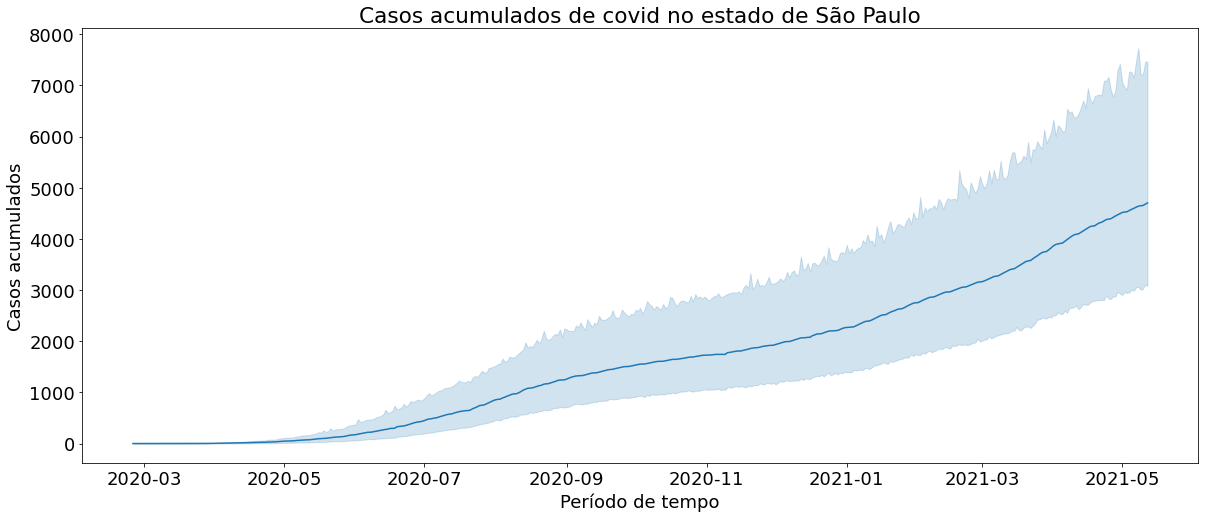

In [395]:
#número de casos, vamos utilizar o seaborn
sns.lineplot(x="datahora", y="casos", data=dados)
plt.title('Casos acumulados de covid no estado de São Paulo')
plt.ylabel('Casos acumulados')
plt.xlabel('Período de tempo')
plt.show()

A linha azul é a média, a região azul clara é a representação entre os menores e os maiores valores de casos (estamos plotando todos os municípios do estado de SP)

$$ e^x $$

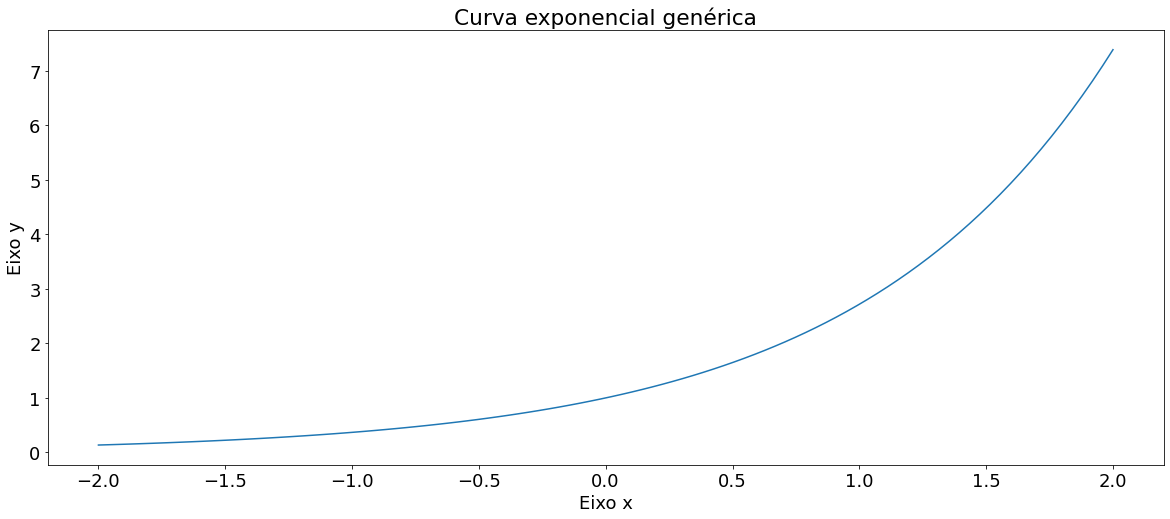

In [396]:
#vamos gerar uma curva exponencial genérica para verificarmos se temos um crescimento exponencial de casos de covid em SP
eixo_x = np.linspace(-2,2,100)
eixo_y_exp = np.exp(eixo_x)

sns.lineplot(x=eixo_x, y=eixo_y_exp)
plt.title("Curva exponencial genérica")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")
plt.show()

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

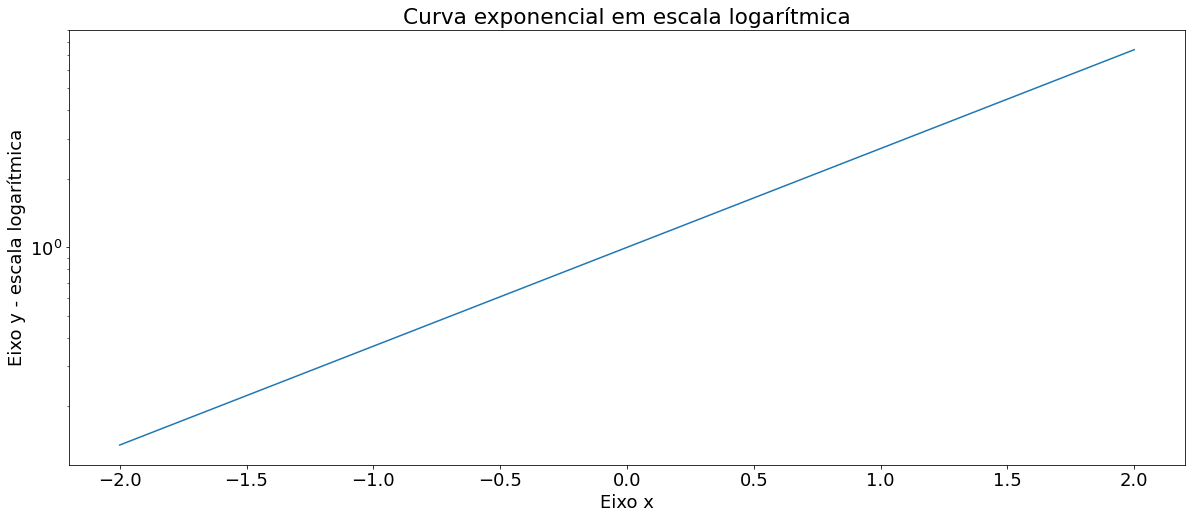

In [397]:
#vamos criar uma linha logarítmica a partir dos dados exponenciais, gerando uma reta
#o nome dessa gráfico é monolog
sns.lineplot(x=eixo_x, y=eixo_y_exp)
mpl.pyplot.yscale("log")
plt.title("Curva exponencial em escala logarítmica")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y - escala logarítmica")
plt.show()

Se gerarmos uma curva logarítmica a partir da linha dos dados (transformação logarítmica) de covid e ela ficar uma reta, quer dizer que temos um crescimento exponencial, conforme o exemplo acima

In [398]:
#vamos fazer somente para o município de São Paulo
dados_sp = dados.query("nome_munic == 'São Paulo'")
dados_sp

nome_munic  codigo_ibge  dia  mes   datahora   casos  casos_novos  \
562     São Paulo      3550308   25    2 2020-02-25       1            0   
1207    São Paulo      3550308   26    2 2020-02-26       1            0   
1852    São Paulo      3550308   27    2 2020-02-27       1            0   
2497    São Paulo      3550308   28    2 2020-02-28       2            1   
3142    São Paulo      3550308   29    2 2020-02-29       2            0   
...           ...          ...  ...  ...        ...     ...          ...   
283072  São Paulo      3550308    8    5 2021-05-08  735057         1998   
283717  São Paulo      3550308    9    5 2021-05-09  736342         1285   
284362  São Paulo      3550308   10    5 2021-05-10  736880          538   
285007  São Paulo      3550308   11    5 2021-05-11  739821         2941   
285652  São Paulo      3550308   12    5 2021-05-12  742629         2808   

            casos_pc    casos_mm7d  obitos  ...          nome_drs cod_drs  \
562     8,424841e-03     0,0000000       0  ...  Grande São Paulo      10   
1207    8,424841e-03     0,0000000       0  ...  Grande São Paulo      10   
1852    8,424841e-03     0,0000000       0  ...  Grande São Paulo      10   
2497    1,684968e-02     0,0000000       0  ...  Grande São Paulo      10   
3142    1,684968e-02     0,0000000       0  ...  Grande São Paulo      10   
...              ...           ...     ...  ...               ...     ...   
283072  6,192738e+03  1956,5714286   28309  ...  Grande São Paulo      10   
283717  6,203564e+03  2024,1428571   28347  ...  Grande São Paulo      10   
284362  6,208097e+03  2008,1428571   28364  ...  Grande São Paulo      10   
285007  6,232874e+03  2039,1428571   28583  ...  Grande São Paulo      10   
285652  6,256531e+03  2069,0000000   28764  ...  Grande São Paulo      10   

             pop   pop_60    area  map_leg map_leg_s  latitude  longitude  \
562     11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
1207    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
1852    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
2497    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
3142    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
...          ...      ...     ...      ...       ...       ...        ...   
283072  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
283717  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
284362  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
285007  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
285652  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   

        semana_epidem  
562                 9  
1207                9  
1852                9  
2497                9  
3142                9  
...               ...  
283072             18  
283717             19  
284362             19  
285007             19  
285652             19  

[443 rows x 26 columns]

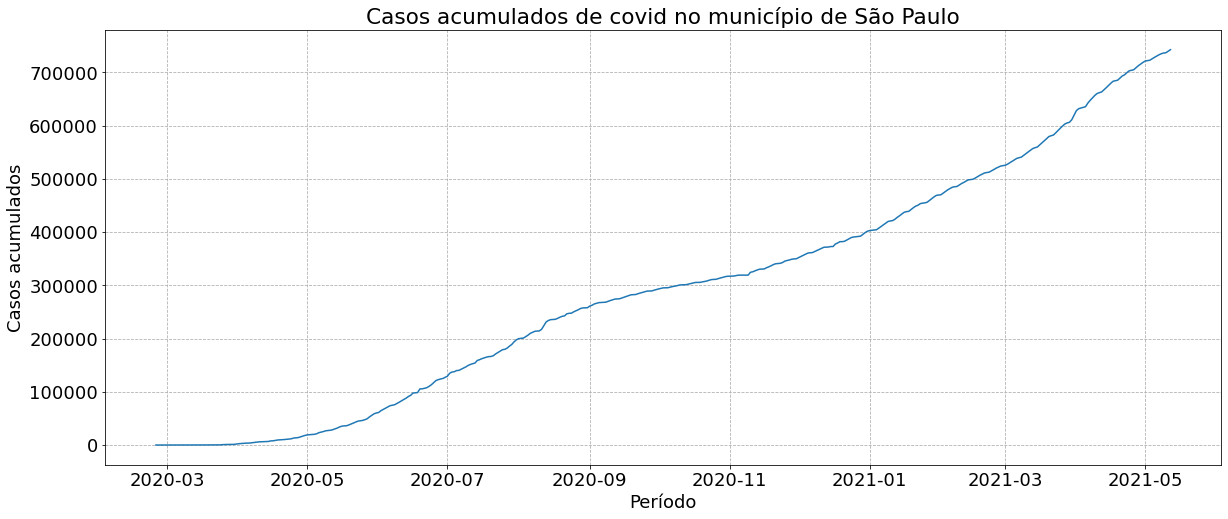

In [399]:
ax = sns.lineplot(x = 'datahora', y = 'casos', data = dados_sp)
plt.title('Casos acumulados de covid no município de São Paulo')
plt.xlabel('Período')
plt.ylabel('Casos acumulados')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

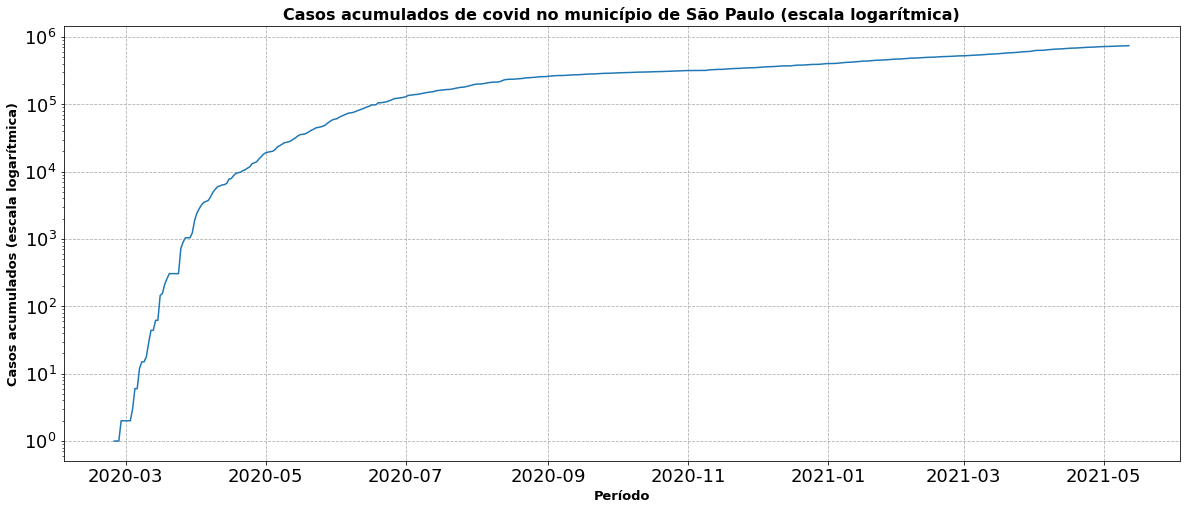

In [400]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")
plt.title('Casos acumulados de covid no município de São Paulo (escala logarítmica)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Casos acumulados (escala logarítmica)', fontdict={'fontsize':13, 'fontweight':'bold'})
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

### Desafio 01: filtrar a base de dados sem utilizar a função .query

In [401]:
#usar o loc
dados.loc[dados["nome_munic"] == "São Paulo", :]

nome_munic  codigo_ibge  dia  mes   datahora   casos  casos_novos  \
562     São Paulo      3550308   25    2 2020-02-25       1            0   
1207    São Paulo      3550308   26    2 2020-02-26       1            0   
1852    São Paulo      3550308   27    2 2020-02-27       1            0   
2497    São Paulo      3550308   28    2 2020-02-28       2            1   
3142    São Paulo      3550308   29    2 2020-02-29       2            0   
...           ...          ...  ...  ...        ...     ...          ...   
283072  São Paulo      3550308    8    5 2021-05-08  735057         1998   
283717  São Paulo      3550308    9    5 2021-05-09  736342         1285   
284362  São Paulo      3550308   10    5 2021-05-10  736880          538   
285007  São Paulo      3550308   11    5 2021-05-11  739821         2941   
285652  São Paulo      3550308   12    5 2021-05-12  742629         2808   

            casos_pc    casos_mm7d  obitos  ...          nome_drs cod_drs  \
562     8,424841e-03     0,0000000       0  ...  Grande São Paulo      10   
1207    8,424841e-03     0,0000000       0  ...  Grande São Paulo      10   
1852    8,424841e-03     0,0000000       0  ...  Grande São Paulo      10   
2497    1,684968e-02     0,0000000       0  ...  Grande São Paulo      10   
3142    1,684968e-02     0,0000000       0  ...  Grande São Paulo      10   
...              ...           ...     ...  ...               ...     ...   
283072  6,192738e+03  1956,5714286   28309  ...  Grande São Paulo      10   
283717  6,203564e+03  2024,1428571   28347  ...  Grande São Paulo      10   
284362  6,208097e+03  2008,1428571   28364  ...  Grande São Paulo      10   
285007  6,232874e+03  2039,1428571   28583  ...  Grande São Paulo      10   
285652  6,256531e+03  2069,0000000   28764  ...  Grande São Paulo      10   

             pop   pop_60    area  map_leg map_leg_s  latitude  longitude  \
562     11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
1207    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
1852    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
2497    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
3142    11869660  1853286  152111      <50       7.0  -23,5329   -46,6395   
...          ...      ...     ...      ...       ...       ...        ...   
283072  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
283717  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
284362  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
285007  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   
285652  11869660  1853286  152111    >5000       1.0  -23,5329   -46,6395   

        semana_epidem  
562                 9  
1207                9  
1852                9  
2497                9  
3142                9  
...               ...  
283072             18  
283717             19  
284362             19  
285007             19  
285652             19  

[443 rows x 26 columns]

### Desafio 02: Escolher outro municípioo para fazer a análise

In [402]:
#Município escolhido foi Campinas
dados_campinas = dados.loc[dados["nome_munic"] == "Campinas", :]
dados_campinas

nome_munic  codigo_ibge  dia  mes   datahora  casos  casos_novos  \
108      Campinas      3509502   25    2 2020-02-25      0            0   
753      Campinas      3509502   26    2 2020-02-26      0            0   
1398     Campinas      3509502   27    2 2020-02-27      0            0   
2043     Campinas      3509502   28    2 2020-02-28      0            0   
2688     Campinas      3509502   29    2 2020-02-29      0            0   
...           ...          ...  ...  ...        ...    ...          ...   
282618   Campinas      3509502    8    5 2021-05-08  79101          277   
283263   Campinas      3509502    9    5 2021-05-09  79146           45   
283908   Campinas      3509502   10    5 2021-05-10  79166           20   
284553   Campinas      3509502   11    5 2021-05-11  79468          302   
285198   Campinas      3509502   12    5 2021-05-12  79653          185   

            casos_pc    casos_mm7d  obitos  ...  nome_drs cod_drs      pop  \
108     0,000000e+00     0,0000000       0  ...  Campinas       3  1175501   
753     0,000000e+00     0,0000000       0  ...  Campinas       3  1175501   
1398    0,000000e+00     0,0000000       0  ...  Campinas       3  1175501   
2043    0,000000e+00     0,0000000       0  ...  Campinas       3  1175501   
2688    0,000000e+00     0,0000000       0  ...  Campinas       3  1175501   
...              ...           ...     ...  ...       ...     ...      ...   
282618  6,729131e+03   277,1428571    3129  ...  Campinas       3  1175501   
283263  6,732959e+03   277,2857143    3129  ...  Campinas       3  1175501   
283908  6,734660e+03   276,7142857    3129  ...  Campinas       3  1175501   
284553  6,760352e+03   258,0000000    3160  ...  Campinas       3  1175501   
285198  6,776090e+03   221,1428571    3174  ...  Campinas       3  1175501   

        pop_60   area  map_leg map_leg_s  latitude  longitude  semana_epidem  
108     192796  79457        0       8.0  -22,9053   -47,0659              9  
753     192796  79457        0       8.0  -22,9053   -47,0659              9  
1398    192796  79457        0       8.0  -22,9053   -47,0659              9  
2043    192796  79457        0       8.0  -22,9053   -47,0659              9  
2688    192796  79457        0       8.0  -22,9053   -47,0659              9  
...        ...    ...      ...       ...       ...        ...            ...  
282618  192796  79457    >5000       1.0  -22,9053   -47,0659             18  
283263  192796  79457    >5000       1.0  -22,9053   -47,0659             19  
283908  192796  79457    >5000       1.0  -22,9053   -47,0659             19  
284553  192796  79457    >5000       1.0  -22,9053   -47,0659             19  
285198  192796  79457    >5000       1.0  -22,9053   -47,0659             19  

[443 rows x 26 columns]

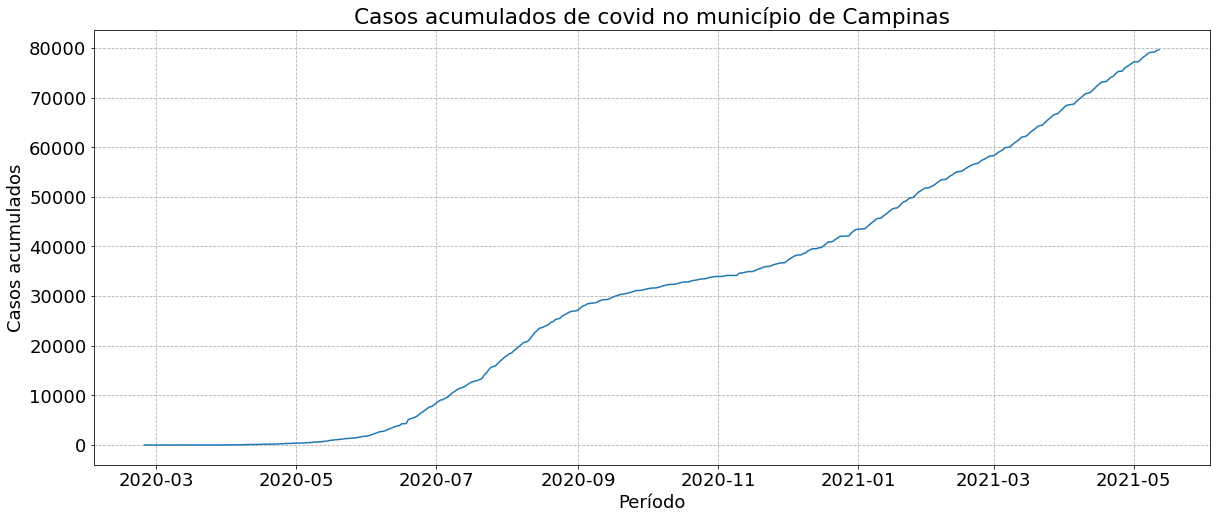

In [403]:
#plotar os casos de covid em Campinas
sns.lineplot(x="datahora", y="casos", data=dados_campinas)
plt.title('Casos acumulados de covid no município de Campinas')
plt.xlabel('Período')
plt.ylabel('Casos acumulados')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

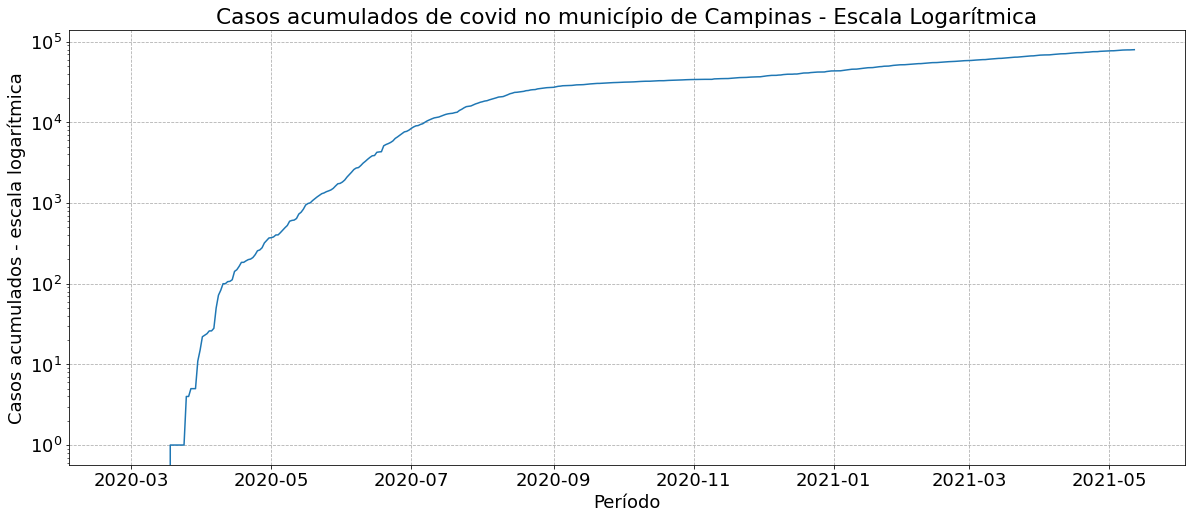

In [404]:
#vamos gerar uma curva logarítmica para os casos de covid em Campinas
sns.lineplot(x="datahora", y="casos", data=dados_campinas)
mpl.pyplot.yscale("log")
plt.title('Casos acumulados de covid no município de Campinas - Escala Logarítmica')
plt.xlabel('Período')
plt.ylabel('Casos acumulados - escala logarítmica')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

## Aula02: Taxa de crescimento e média móvel

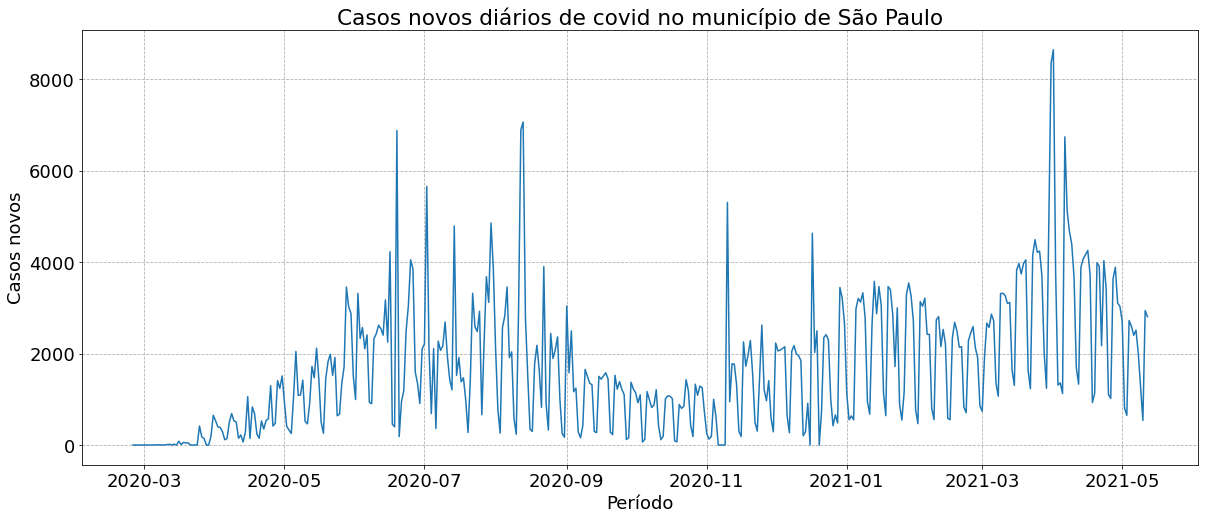

In [405]:
#casos novos do município de São Paulo
sns.lineplot(x="datahora", y="casos_novos", data=dados_sp)
plt.title('Casos novos diários de covid no município de São Paulo')
plt.xlabel('Período')
plt.ylabel('Casos novos')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

Diferenciação: é a taxa de crescimento através da diferença entre os pontos
equação da reta: y = ax + b, fazendo a diferenciação nós encontramos o coeficiente angular da reta, no nosso exemplo o coeficiente angular é 1: y = 1x + b

In [406]:
#exemplo de diferenciação
#criação de um dataframe com uma reta linear
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))
dados_exemplo

0
0   1.0
1   2.0
2   3.0
3   4.0
4   5.0
5   6.0
6   7.0
7   8.0
8   9.0
9  10.0

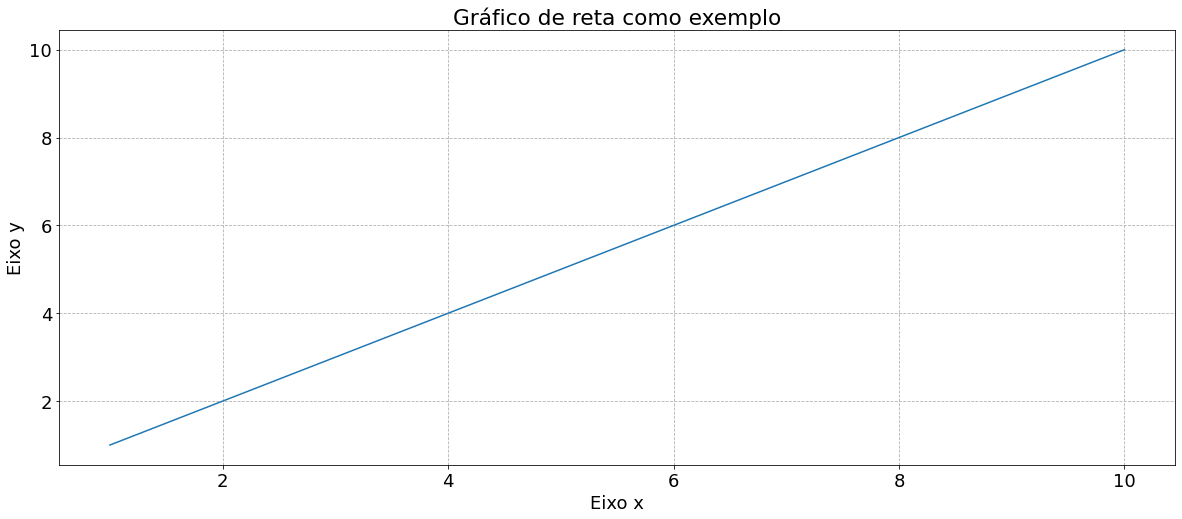

In [407]:
sns.lineplot(x = 0, y = 0, data=dados_exemplo)
plt.title('Gráfico de reta como exemplo')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

In [408]:
#vamos diferenciar esse exemplo
#nova coluna no dataframe
dados_exemplo["diferenciado"] = dados_exemplo.diff()
dados_exemplo

0  diferenciado
0   1.0           NaN
1   2.0           1.0
2   3.0           1.0
3   4.0           1.0
4   5.0           1.0
5   6.0           1.0
6   7.0           1.0
7   8.0           1.0
8   9.0           1.0
9  10.0           1.0

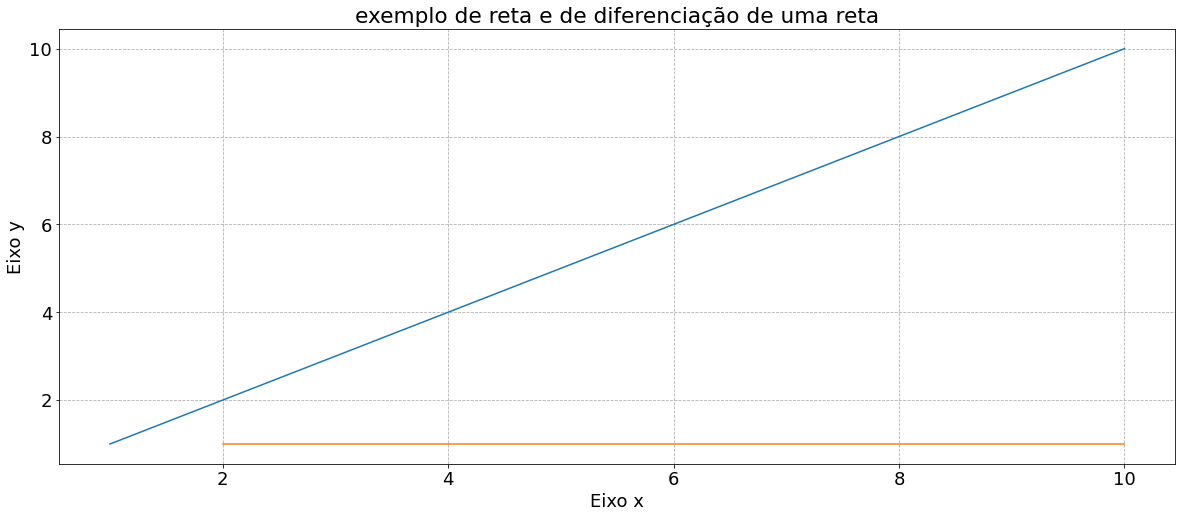

In [409]:
sns.lineplot(x = 0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y="diferenciado", data=dados_exemplo)
plt.title('exemplo de reta e de diferenciação de uma reta')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
#plt.xticks(rotation = 45)
plt.grid(linestyle = '--')
plt.show()

In [410]:
#vamos voltar para os dados de São Paulo
#diferenciação
dados_sp["taxa_de_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_de_crescimento_obitos"] = dados_sp["obitos_novos"].diff()
dados_sp

nome_munic  codigo_ibge  dia  mes   datahora   casos  casos_novos  \
562     São Paulo      3550308   25    2 2020-02-25       1            0   
1207    São Paulo      3550308   26    2 2020-02-26       1            0   
1852    São Paulo      3550308   27    2 2020-02-27       1            0   
2497    São Paulo      3550308   28    2 2020-02-28       2            1   
3142    São Paulo      3550308   29    2 2020-02-29       2            0   
...           ...          ...  ...  ...        ...     ...          ...   
283072  São Paulo      3550308    8    5 2021-05-08  735057         1998   
283717  São Paulo      3550308    9    5 2021-05-09  736342         1285   
284362  São Paulo      3550308   10    5 2021-05-10  736880          538   
285007  São Paulo      3550308   11    5 2021-05-11  739821         2941   
285652  São Paulo      3550308   12    5 2021-05-12  742629         2808   

            casos_pc    casos_mm7d  obitos  ...       pop   pop_60    area  \
562     8,424841e-03     0,0000000       0  ...  11869660  1853286  152111   
1207    8,424841e-03     0,0000000       0  ...  11869660  1853286  152111   
1852    8,424841e-03     0,0000000       0  ...  11869660  1853286  152111   
2497    1,684968e-02     0,0000000       0  ...  11869660  1853286  152111   
3142    1,684968e-02     0,0000000       0  ...  11869660  1853286  152111   
...              ...           ...     ...  ...       ...      ...     ...   
283072  6,192738e+03  1956,5714286   28309  ...  11869660  1853286  152111   
283717  6,203564e+03  2024,1428571   28347  ...  11869660  1853286  152111   
284362  6,208097e+03  2008,1428571   28364  ...  11869660  1853286  152111   
285007  6,232874e+03  2039,1428571   28583  ...  11869660  1853286  152111   
285652  6,256531e+03  2069,0000000   28764  ...  11869660  1853286  152111   

       map_leg map_leg_s  latitude longitude  semana_epidem  \
562        <50       7.0  -23,5329  -46,6395              9   
1207       <50       7.0  -23,5329  -46,6395              9   
1852       <50       7.0  -23,5329  -46,6395              9   
2497       <50       7.0  -23,5329  -46,6395              9   
3142       <50       7.0  -23,5329  -46,6395              9   
...        ...       ...       ...       ...            ...   
283072   >5000       1.0  -23,5329  -46,6395             18   
283717   >5000       1.0  -23,5329  -46,6395             19   
284362   >5000       1.0  -23,5329  -46,6395             19   
285007   >5000       1.0  -23,5329  -46,6395             19   
285652   >5000       1.0  -23,5329  -46,6395             19   

        taxa_de_crescimento_casos  taxa_de_crescimento_obitos  
562                           NaN                         NaN  
1207                          0.0                         0.0  
1852                          0.0                         0.0  
2497                          1.0                         0.0  
3142                         -1.0                         0.0  
...                           ...                         ...  
283072                     -515.0                        35.0  
283717                     -713.0                      -140.0  
284362                     -747.0                       -21.0  
285007                     2403.0                       202.0  
285652                     -133.0                       -38.0  

[443 rows x 28 columns]

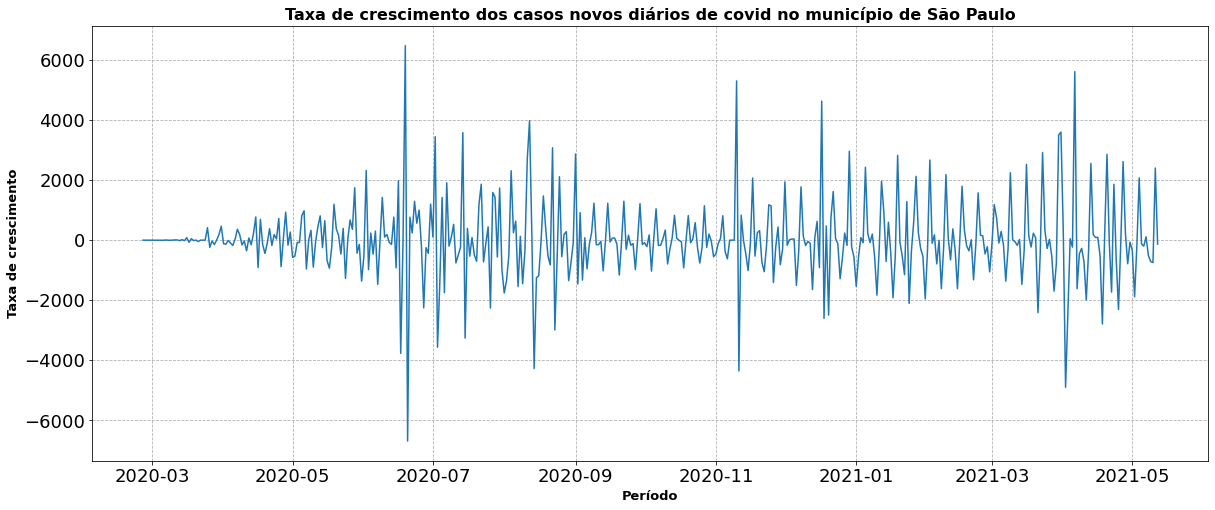

In [411]:
sns.lineplot(x="datahora", y="taxa_de_crescimento_casos", data=dados_sp)
plt.title('Taxa de crescimento dos casos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

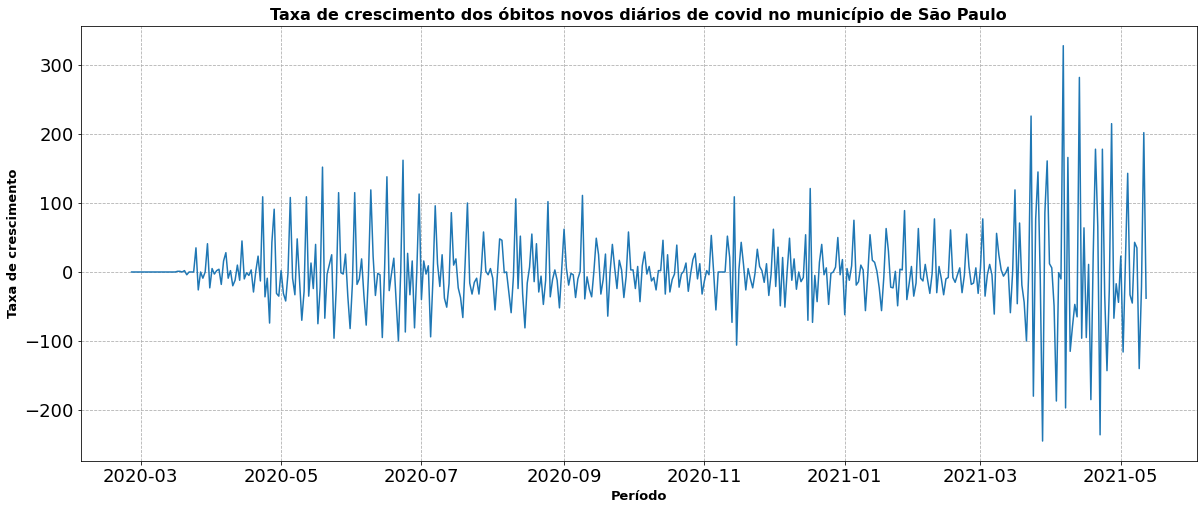

In [412]:
sns.lineplot(x="datahora", y="taxa_de_crescimento_obitos", data=dados_sp)
plt.title('Taxa de crescimento dos óbitos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

### Desafio 01: Eliminar os avisos (warnings) 

- Nos gráficos adicionar "plt.show()"
- Para os avisos do pandas:
    - import warnings
    - warnings.filterwarnings('ignore')

### Desafio 02: Verificar se a taxa de casos novos coincide com a taxa de óbitos novos

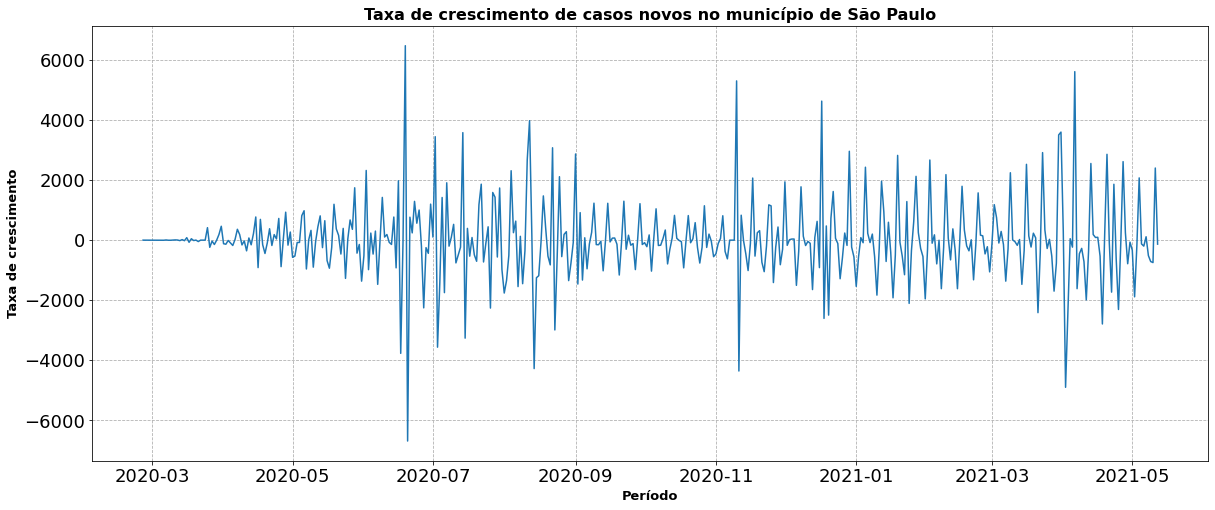

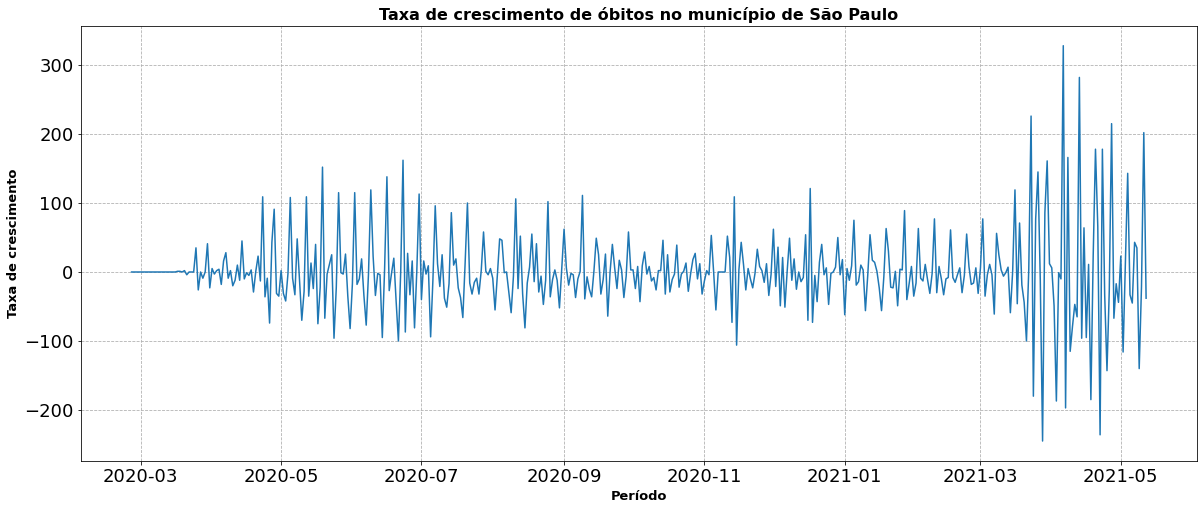

In [413]:
sns.lineplot(x="datahora", y="taxa_de_crescimento_casos", data=dados_sp)
plt.title('Taxa de crescimento de casos novos no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()
sns.lineplot(x="datahora", y="taxa_de_crescimento_obitos", data=dados_sp)
plt.title('Taxa de crescimento de óbitos no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

Utilizando apenas o visual para fazer uma comparação, não parece ter uma correlação entre os picos de casos novos e de óbitos, uma explicação é porque há um intervalo entre a notificação do caso e o desenvilvimento da doença que ocasiona em óbito

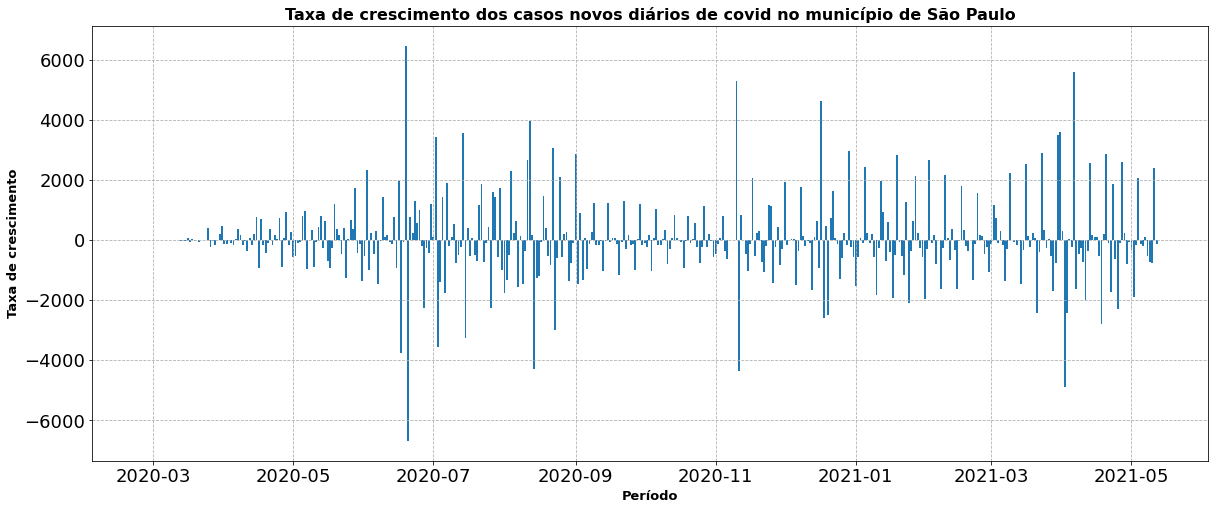

In [414]:
#plotar um gráfico de barras para uma visualização diferentre dos dados
plt.bar(dados_sp["datahora"], dados_sp["taxa_de_crescimento_casos"])
plt.title('Taxa de crescimento dos casos novos diários de covid no município de São Paulo', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

In [415]:
#vamos separar os anos de 2020 e 2021 para uma melhor visualização
dados_sp["ano"] = pd.DatetimeIndex(dados_sp["datahora"]).year
dados_sp

nome_munic  codigo_ibge  dia  mes   datahora   casos  casos_novos  \
562     São Paulo      3550308   25    2 2020-02-25       1            0   
1207    São Paulo      3550308   26    2 2020-02-26       1            0   
1852    São Paulo      3550308   27    2 2020-02-27       1            0   
2497    São Paulo      3550308   28    2 2020-02-28       2            1   
3142    São Paulo      3550308   29    2 2020-02-29       2            0   
...           ...          ...  ...  ...        ...     ...          ...   
283072  São Paulo      3550308    8    5 2021-05-08  735057         1998   
283717  São Paulo      3550308    9    5 2021-05-09  736342         1285   
284362  São Paulo      3550308   10    5 2021-05-10  736880          538   
285007  São Paulo      3550308   11    5 2021-05-11  739821         2941   
285652  São Paulo      3550308   12    5 2021-05-12  742629         2808   

            casos_pc    casos_mm7d  obitos  ...   pop_60    area map_leg  \
562     8,424841e-03     0,0000000       0  ...  1853286  152111     <50   
1207    8,424841e-03     0,0000000       0  ...  1853286  152111     <50   
1852    8,424841e-03     0,0000000       0  ...  1853286  152111     <50   
2497    1,684968e-02     0,0000000       0  ...  1853286  152111     <50   
3142    1,684968e-02     0,0000000       0  ...  1853286  152111     <50   
...              ...           ...     ...  ...      ...     ...     ...   
283072  6,192738e+03  1956,5714286   28309  ...  1853286  152111   >5000   
283717  6,203564e+03  2024,1428571   28347  ...  1853286  152111   >5000   
284362  6,208097e+03  2008,1428571   28364  ...  1853286  152111   >5000   
285007  6,232874e+03  2039,1428571   28583  ...  1853286  152111   >5000   
285652  6,256531e+03  2069,0000000   28764  ...  1853286  152111   >5000   

       map_leg_s  latitude  longitude semana_epidem  \
562          7.0  -23,5329   -46,6395             9   
1207         7.0  -23,5329   -46,6395             9   
1852         7.0  -23,5329   -46,6395             9   
2497         7.0  -23,5329   -46,6395             9   
3142         7.0  -23,5329   -46,6395             9   
...          ...       ...        ...           ...   
283072       1.0  -23,5329   -46,6395            18   
283717       1.0  -23,5329   -46,6395            19   
284362       1.0  -23,5329   -46,6395            19   
285007       1.0  -23,5329   -46,6395            19   
285652       1.0  -23,5329   -46,6395            19   

        taxa_de_crescimento_casos  taxa_de_crescimento_obitos   ano  
562                           NaN                         NaN  2020  
1207                          0.0                         0.0  2020  
1852                          0.0                         0.0  2020  
2497                          1.0                         0.0  2020  
3142                         -1.0                         0.0  2020  
...                           ...                         ...   ...  
283072                     -515.0                        35.0  2021  
283717                     -713.0                      -140.0  2021  
284362                     -747.0                       -21.0  2021  
285007                     2403.0                       202.0  2021  
285652                     -133.0                       -38.0  2021  

[443 rows x 29 columns]

In [416]:
#criar um  novo dataframe para o ano de 2021
dados_2021 = dados_sp.query("ano == 2021")
dados_2021

nome_munic  codigo_ibge  dia  mes   datahora   casos  casos_novos  \
201157  São Paulo      3550308    1    1 2021-01-01  402835         1117   
201802  São Paulo      3550308    2    1 2021-01-02  403388          553   
202447  São Paulo      3550308    3    1 2021-01-03  404025          637   
203092  São Paulo      3550308    4    1 2021-01-04  404576          551   
203737  São Paulo      3550308    5    1 2021-01-05  407557         2981   
...           ...          ...  ...  ...        ...     ...          ...   
283072  São Paulo      3550308    8    5 2021-05-08  735057         1998   
283717  São Paulo      3550308    9    5 2021-05-09  736342         1285   
284362  São Paulo      3550308   10    5 2021-05-10  736880          538   
285007  São Paulo      3550308   11    5 2021-05-11  739821         2941   
285652  São Paulo      3550308   12    5 2021-05-12  742629         2808   

            casos_pc    casos_mm7d  obitos  ...   pop_60    area map_leg  \
201157  3,393821e+03  1714,4285714   15695  ...  1853286  152111   >5000   
201802  3,398480e+03  1733,0000000   15716  ...  1853286  152111   >5000   
202447  3,403846e+03  1729,7142857   15725  ...  1853286  152111   >5000   
203092  3,408489e+03  1739,2857143   15743  ...  1853286  152111   >5000   
203737  3,433603e+03  1673,0000000   15836  ...  1853286  152111   >5000   
...              ...           ...     ...  ...      ...     ...     ...   
283072  6,192738e+03  1956,5714286   28309  ...  1853286  152111   >5000   
283717  6,203564e+03  2024,1428571   28347  ...  1853286  152111   >5000   
284362  6,208097e+03  2008,1428571   28364  ...  1853286  152111   >5000   
285007  6,232874e+03  2039,1428571   28583  ...  1853286  152111   >5000   
285652  6,256531e+03  2069,0000000   28764  ...  1853286  152111   >5000   

       map_leg_s  latitude  longitude semana_epidem  \
201157       1.0  -23,5329   -46,6395            53   
201802       1.0  -23,5329   -46,6395            53   
202447       1.0  -23,5329   -46,6395             1   
203092       1.0  -23,5329   -46,6395             1   
203737       1.0  -23,5329   -46,6395             1   
...          ...       ...        ...           ...   
283072       1.0  -23,5329   -46,6395            18   
283717       1.0  -23,5329   -46,6395            19   
284362       1.0  -23,5329   -46,6395            19   
285007       1.0  -23,5329   -46,6395            19   
285652       1.0  -23,5329   -46,6395            19   

        taxa_de_crescimento_casos  taxa_de_crescimento_obitos   ano  
201157                    -1540.0                       -62.0  2021  
201802                     -564.0                         5.0  2021  
202447                       84.0                       -12.0  2021  
203092                      -86.0                         9.0  2021  
203737                     2430.0                        75.0  2021  
...                           ...                         ...   ...  
283072                     -515.0                        35.0  2021  
283717                     -713.0                      -140.0  2021  
284362                     -747.0                       -21.0  2021  
285007                     2403.0                       202.0  2021  
285652                     -133.0                       -38.0  2021  

[132 rows x 29 columns]

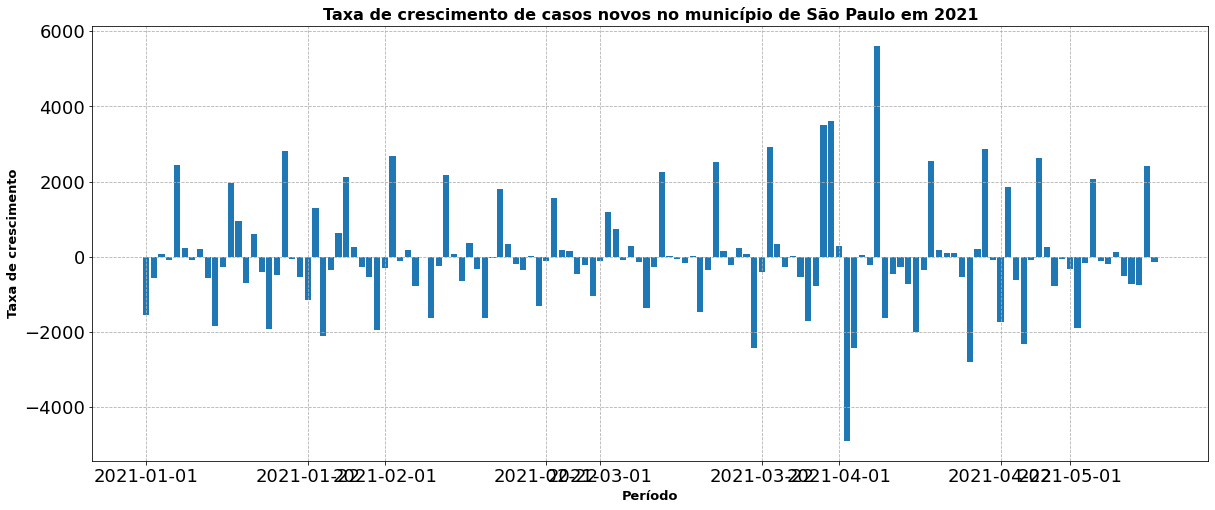

In [417]:
plt.bar(dados_2021["datahora"], dados_2021["taxa_de_crescimento_casos"])
plt.title('Taxa de crescimento de casos novos no município de São Paulo em 2021', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Período', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.ylabel('Taxa de crescimento', fontdict={'fontsize':13, 'fontweight':'bold'})
plt.grid(linestyle = '--')
plt.show()

### Desafio 03: Melhorar as visualizações de gráficos (títulos, labels, etc)

Foram colocados títulos e nomes dos eixos em todos os gráficos, assim como um grid para facilitar a visualização

In [418]:
#plotar a média patra termis uma idea de tendência
#vamos trabalhar com média móvel com janela de 7 dias
#a média móvel suaviza os picos dos gráficos, suaviza a sazonalidade
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7, center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7, center=False).mean()
dados_sp.head(15)

nome_munic  codigo_ibge  dia  mes   datahora  casos  casos_novos  \
562   São Paulo      3550308   25    2 2020-02-25      1            0   
1207  São Paulo      3550308   26    2 2020-02-26      1            0   
1852  São Paulo      3550308   27    2 2020-02-27      1            0   
2497  São Paulo      3550308   28    2 2020-02-28      2            1   
3142  São Paulo      3550308   29    2 2020-02-29      2            0   
3787  São Paulo      3550308    1    3 2020-03-01      2            0   
4432  São Paulo      3550308    2    3 2020-03-02      2            0   
5077  São Paulo      3550308    3    3 2020-03-03      2            0   
5722  São Paulo      3550308    4    3 2020-03-04      3            1   
6367  São Paulo      3550308    5    3 2020-03-05      6            3   
7012  São Paulo      3550308    6    3 2020-03-06      6            0   
7657  São Paulo      3550308    7    3 2020-03-07     12            6   
8302  São Paulo      3550308    8    3 2020-03-08     15            3   
8947  São Paulo      3550308    9    3 2020-03-09     15            0   
9592  São Paulo      3550308   10    3 2020-03-10     18            3   

          casos_pc    casos_mm7d  obitos  ...  map_leg map_leg_s  latitude  \
562   8,424841e-03     0,0000000       0  ...      <50       7.0  -23,5329   
1207  8,424841e-03     0,0000000       0  ...      <50       7.0  -23,5329   
1852  8,424841e-03     0,0000000       0  ...      <50       7.0  -23,5329   
2497  1,684968e-02     0,0000000       0  ...      <50       7.0  -23,5329   
3142  1,684968e-02     0,0000000       0  ...      <50       7.0  -23,5329   
3787  1,684968e-02     0,0000000       0  ...      <50       7.0  -23,5329   
4432  1,684968e-02     0,1428571       0  ...      <50       7.0  -23,5329   
5077  1,684968e-02     0,1428571       0  ...      <50       7.0  -23,5329   
5722  2,527452e-02     0,2857143       0  ...      <50       7.0  -23,5329   
6367  5,054905e-02     0,7142857       0  ...      <50       7.0  -23,5329   
7012  5,054905e-02     0,5714286       0  ...      <50       7.0  -23,5329   
7657  1,010981e-01     1,4285714       0  ...      <50       7.0  -23,5329   
8302  1,263726e-01     1,8571429       0  ...      <50       7.0  -23,5329   
8947  1,263726e-01     1,8571429       0  ...      <50       7.0  -23,5329   
9592  1,516471e-01     2,2857143       0  ...      <50       7.0  -23,5329   

     longitude semana_epidem  taxa_de_crescimento_casos  \
562   -46,6395             9                        NaN   
1207  -46,6395             9                        0.0   
1852  -46,6395             9                        0.0   
2497  -46,6395             9                        1.0   
3142  -46,6395             9                       -1.0   
3787  -46,6395            10                        0.0   
4432  -46,6395            10                        0.0   
5077  -46,6395            10                        0.0   
5722  -46,6395            10                        1.0   
6367  -46,6395            10                        2.0   
7012  -46,6395            10                       -3.0   
7657  -46,6395            10                        6.0   
8302  -46,6395            11                       -3.0   
8947  -46,6395            11                       -3.0   
9592  -46,6395            11                        3.0   

     taxa_de_crescimento_obitos   ano  media_movel_casos  media_movel_obitos  
562                         NaN  2020                NaN                 NaN  
1207                        0.0  2020                NaN                 NaN  
1852                        0.0  2020                NaN                 NaN  
2497                        0.0  2020                NaN                 NaN  
3142                        0.0  2020                NaN                 NaN  
3787                        0.0  2020                NaN                 NaN  
4432                        0.0  2020           0.142857                 0.0  
5077      

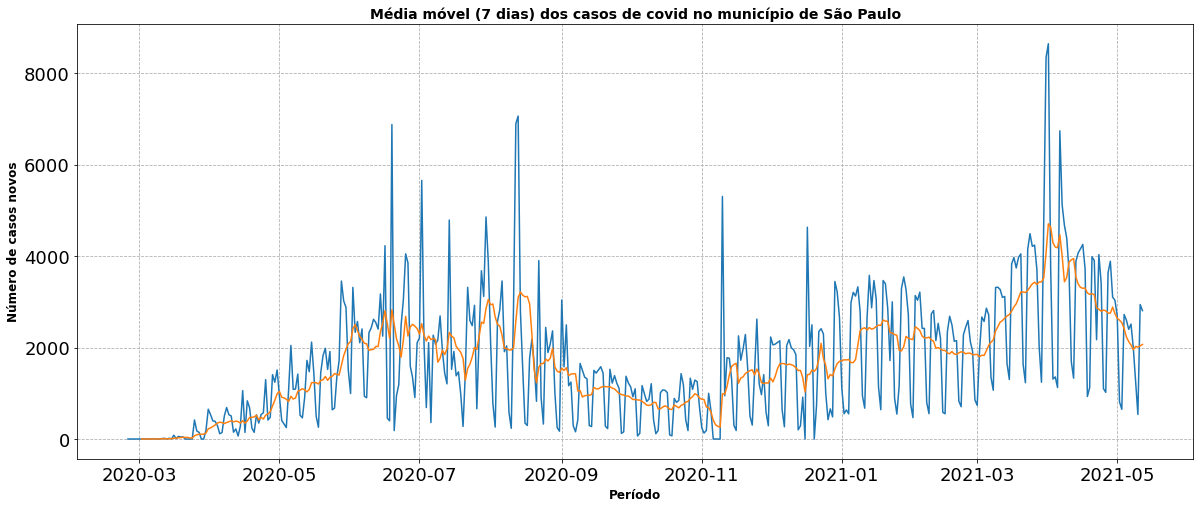

In [419]:
sns.lineplot(x="datahora", y="casos_novos", data=dados_sp)
sns.lineplot(x="datahora", y="media_movel_casos", data=dados_sp)
plt.title('Média móvel (7 dias) dos casos de covid no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novos', fontsize=12, weight= 'bold')
plt.grid(linestyle = '--')
plt.show()

### Desafio 04: Plotar a média móvel de óbitos. Mudar os gráficos de casos de linha para barra

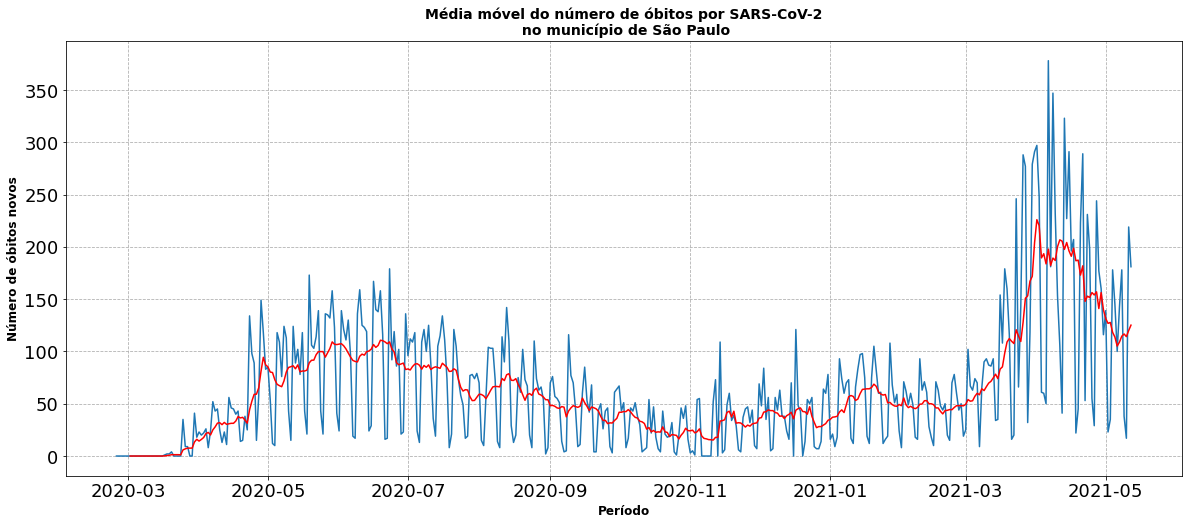

In [420]:
#Média móvel de óbitos
sns.lineplot(x='datahora', y='obitos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp, color= 'red')
plt.title('Média móvel do número de óbitos por SARS-CoV-2\n no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de óbitos novos', fontsize=12, weight= 'bold')
plt.grid(linestyle = '--')
plt.show()

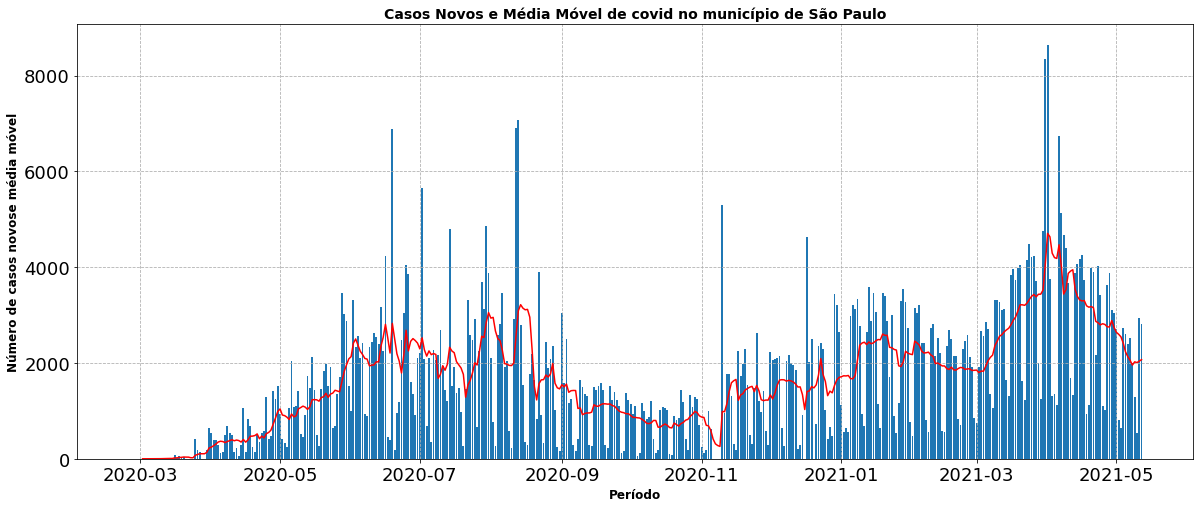

In [421]:
#Gráfico de casos em barra ao invés de linha
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'])
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp, color= 'red')
plt.title('Casos Novos e Média Móvel de covid no município de São Paulo', fontsize=14, weight= 'bold')
plt.xlabel('Período', fontsize=12, weight= 'bold')
plt.ylabel('Número de casos novose média móvel', fontsize=12, weight= 'bold')
plt.grid(linestyle = '--')
plt.show()

## Aula 03: Correlação e função de autocorrelação

## Sazonalidade e Correlação de dados

<AxesSubplot:xlabel='casos_novos', ylabel='casos_novos'>

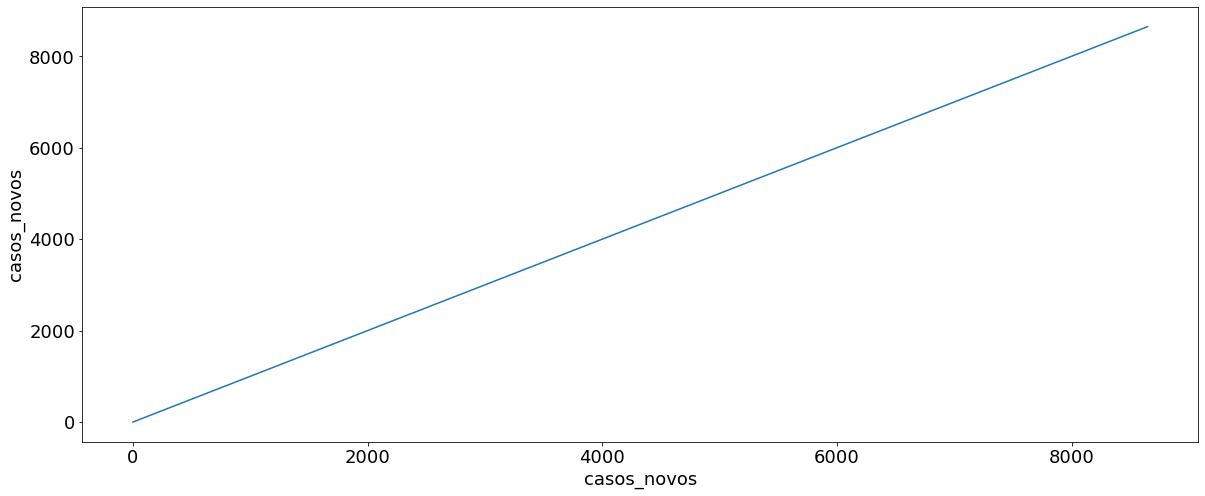

In [422]:
#correlação perfeita
sns.lineplot(x="casos_novos", y="casos_novos", data=dados_sp)

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

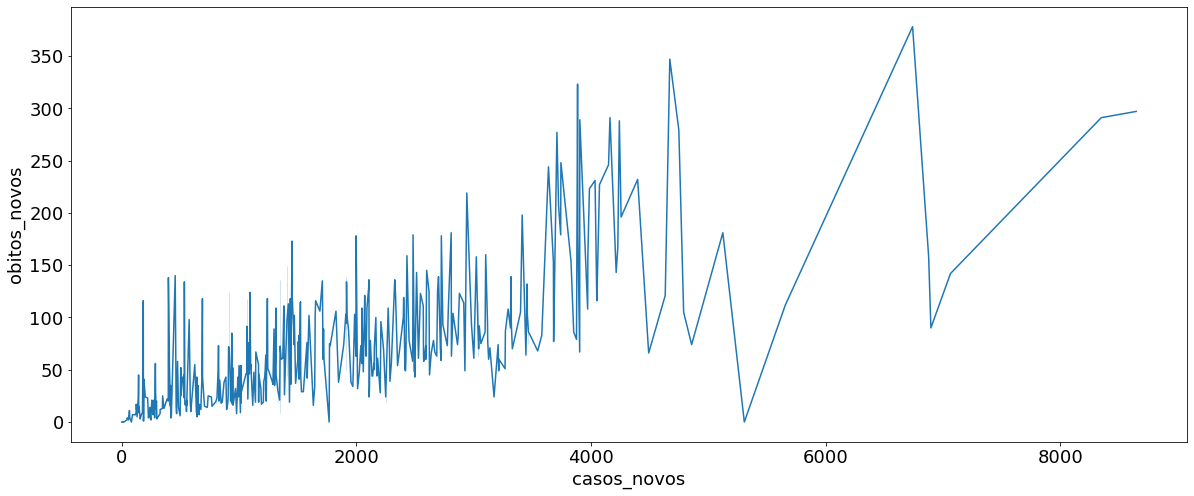

In [423]:
#correlação entre casos novos e óbitos
sns.lineplot(x="casos_novos", y="obitos_novos", data=dados_sp)

### Desafio 05: Mover o número de óbitos alguns dias e verificar o resultado da correlação no gráfico

Há uma hipótese de que casos novos demorariam alguns dias para ocasionar óbitos, portanto haveria uma janela de dias entre essas ocorrências, iremos mover a coluna de óbitos alguns dias e verificar a correlação (usando _shift_)

> Após plotar os gráficos abaixo, não consegui encontrar uma correlação entre casos novos e óbitos nas janelas utilizadas: janela_de_dias = [2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 21, 28]


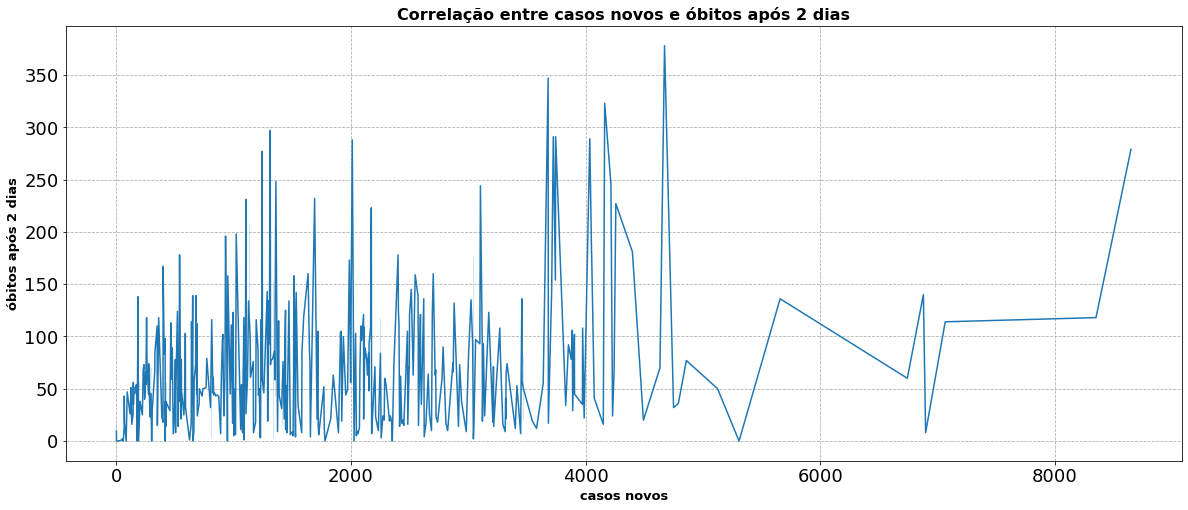

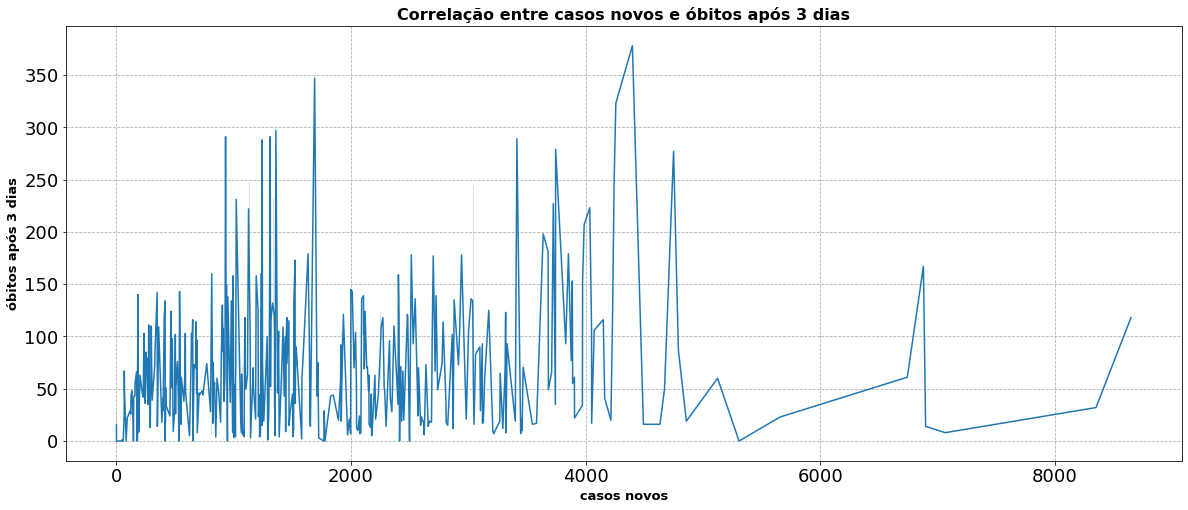

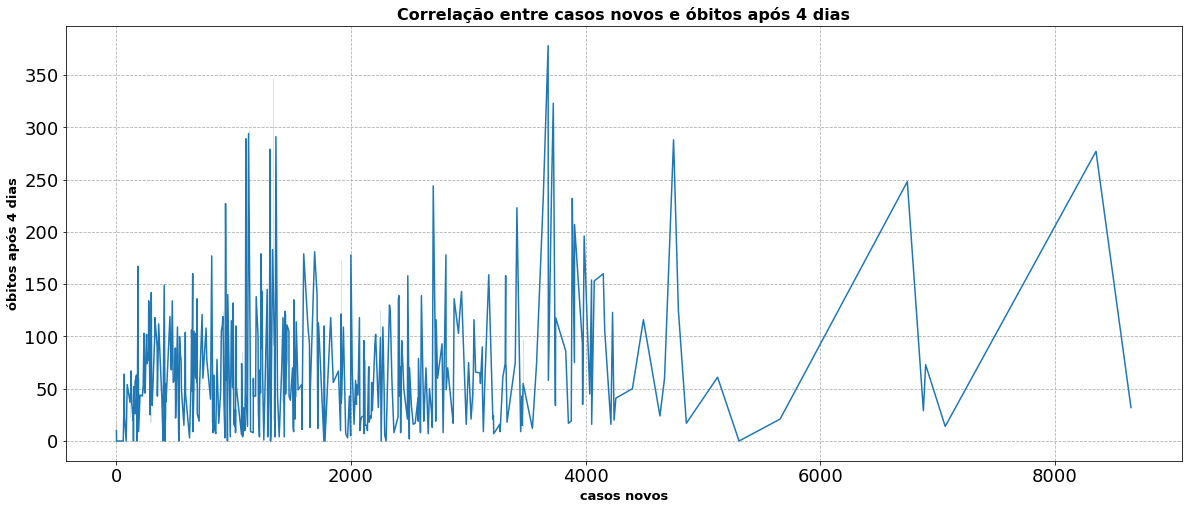

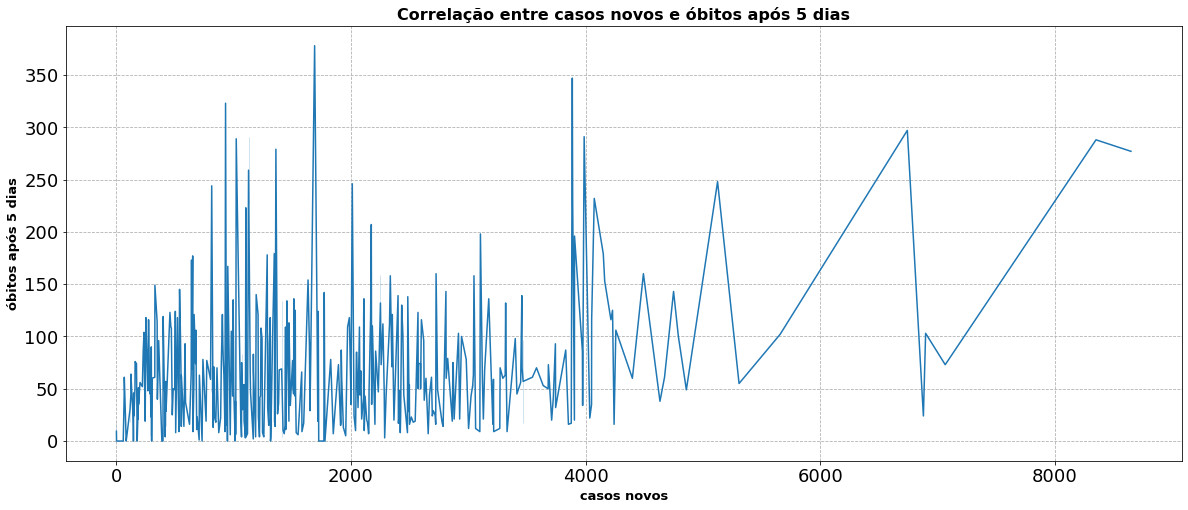

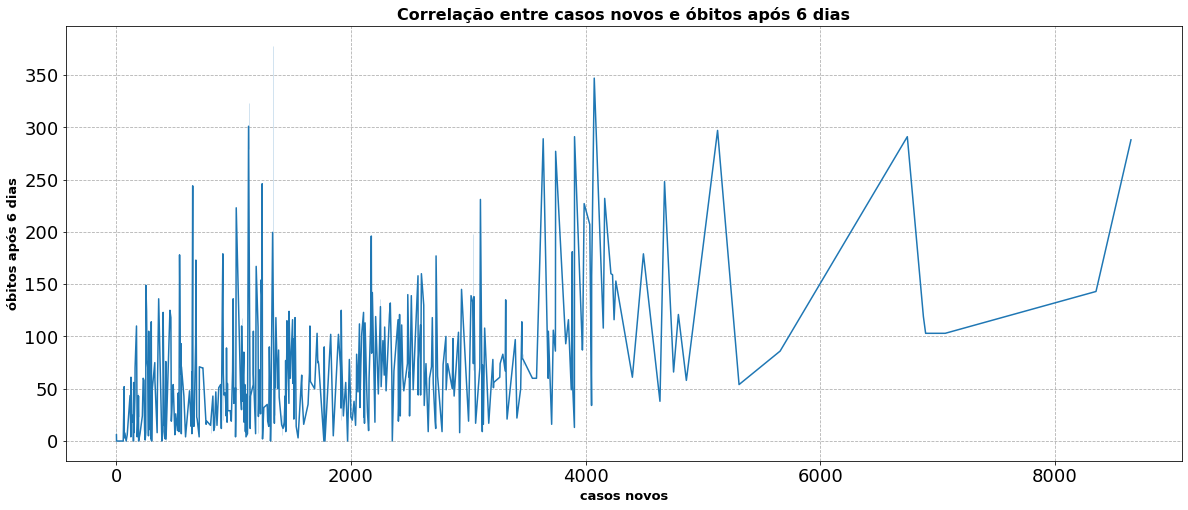

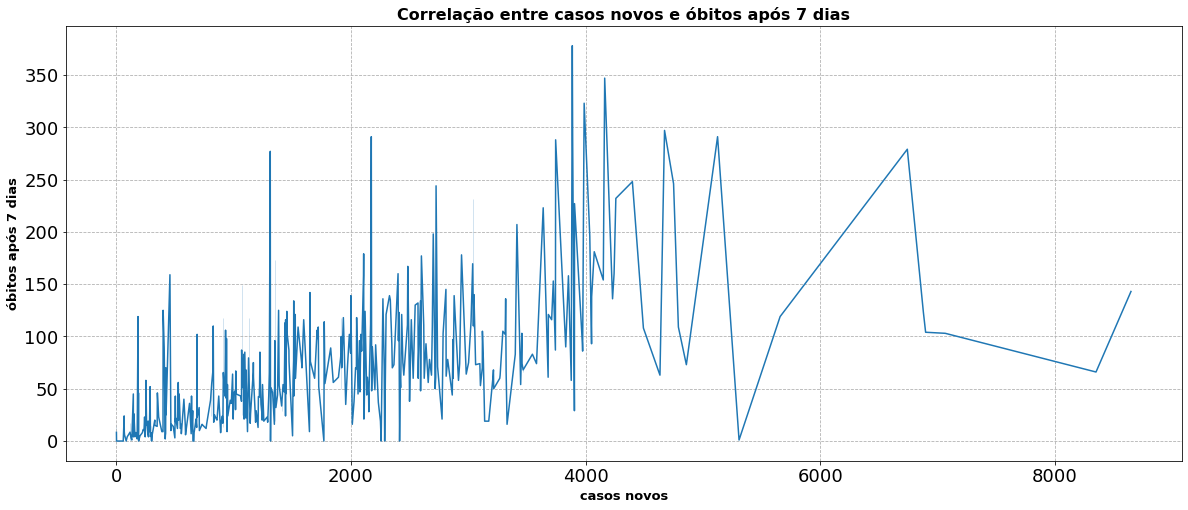

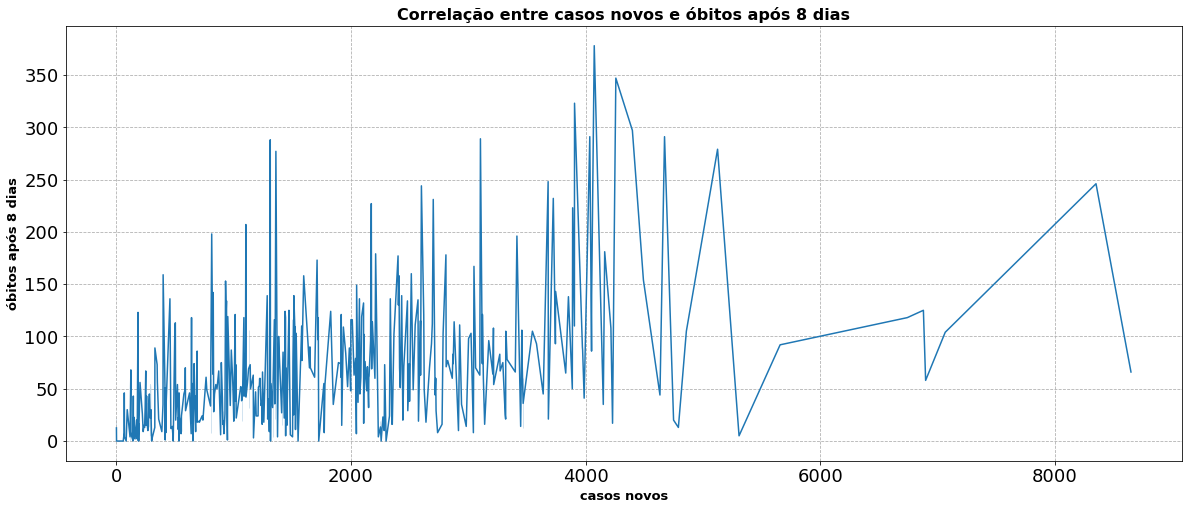

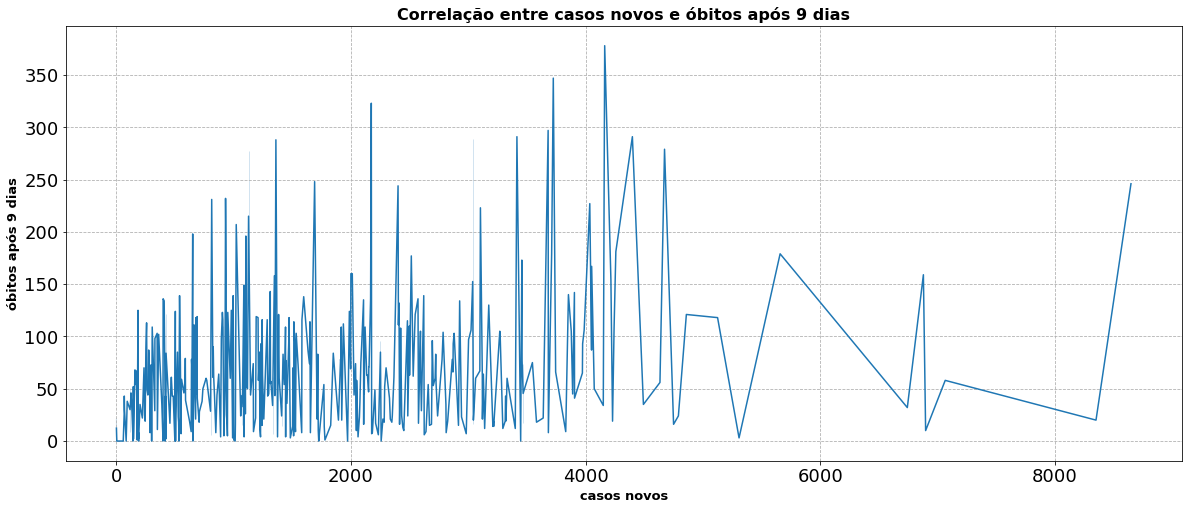

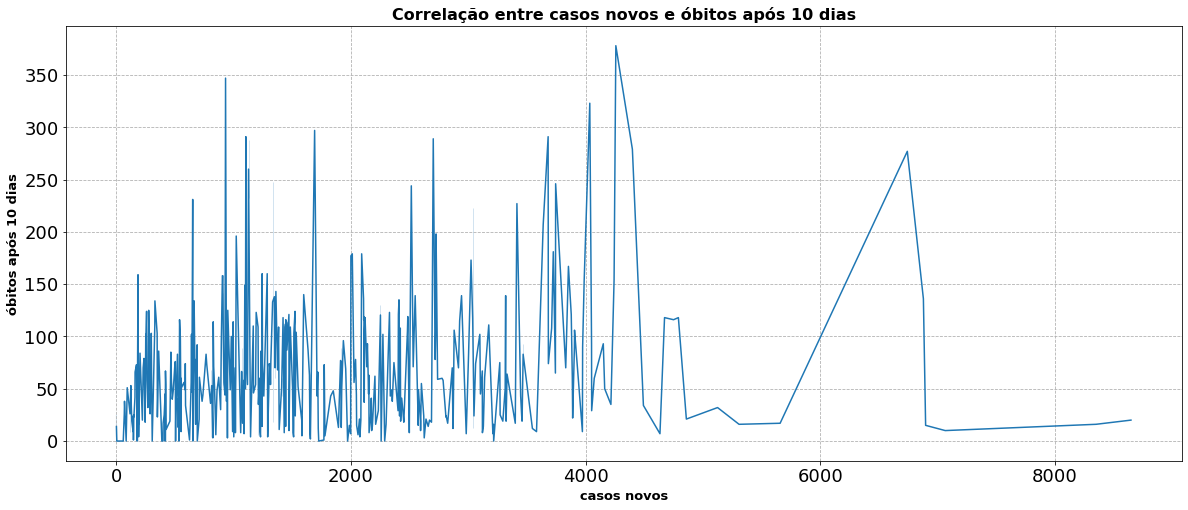

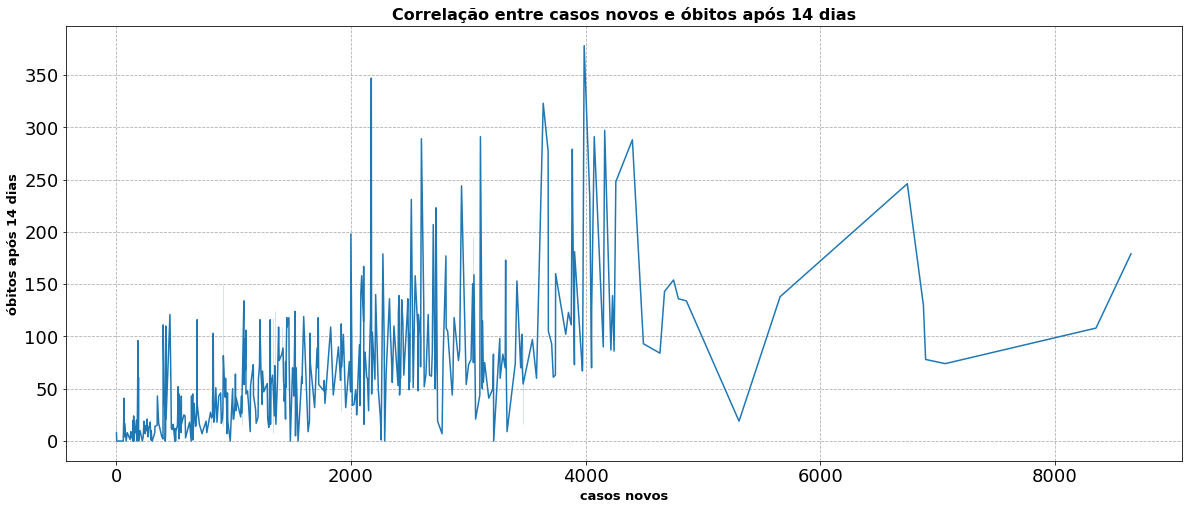

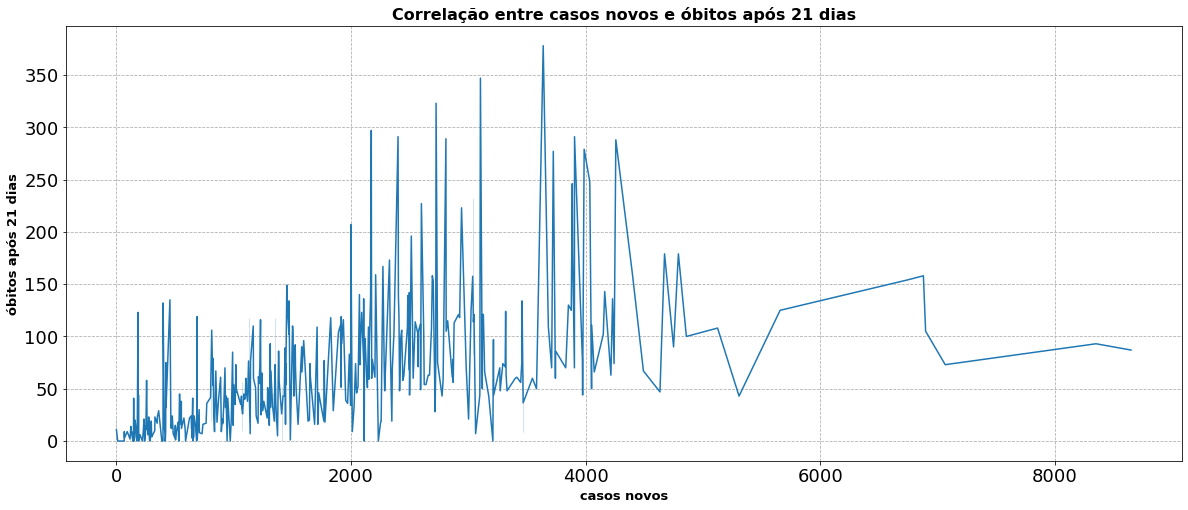

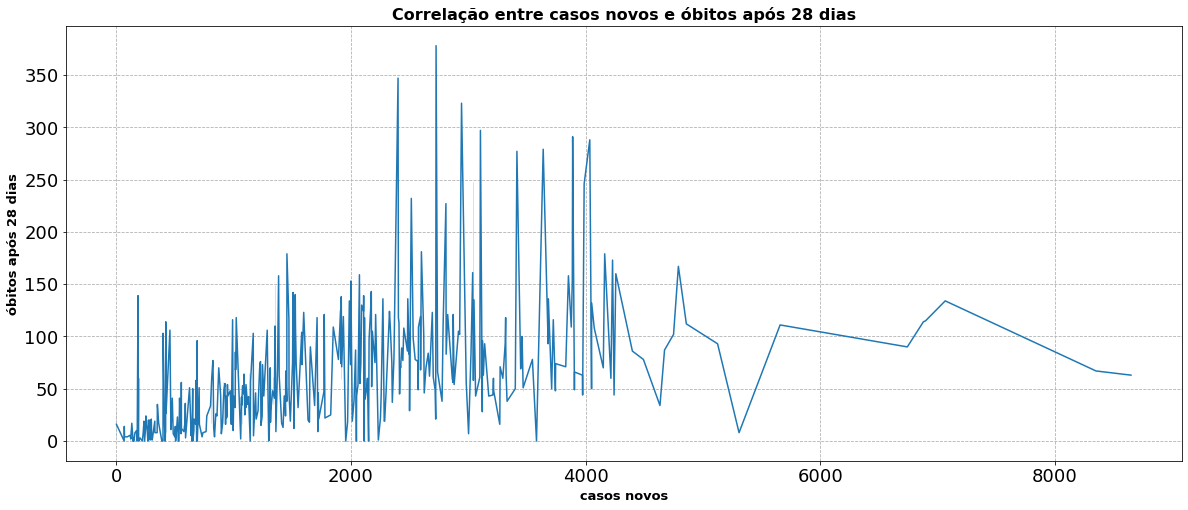

In [424]:
janela_de_dias = [2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 21, 28]

for dias in janela_de_dias:
    dados_sp["janela"] = dados_sp['obitos_novos'].shift(dias)
    sns.lineplot(x="casos_novos", y="janela", data=dados_sp)
    plt.title(f'Correlação entre casos novos e óbitos após {dias} dias', fontdict={'fontsize':16, 'fontweight':'bold'})
    plt.xlabel('casos novos', fontdict={'fontsize':13, 'fontweight':'bold'})
    plt.ylabel(f'óbitos após {dias} dias', fontdict={'fontsize':13, 'fontweight':'bold'})
    plt.grid(linestyle = '--')
    plt.show()

In [425]:
#Vamos criar dois dataframes, um para cada mês inicial de 2021
dados_202101 = dados_sp.query("mes==1 & ano==2021")
dados_202102 = dados_sp.query("mes==2 & ano==2021")

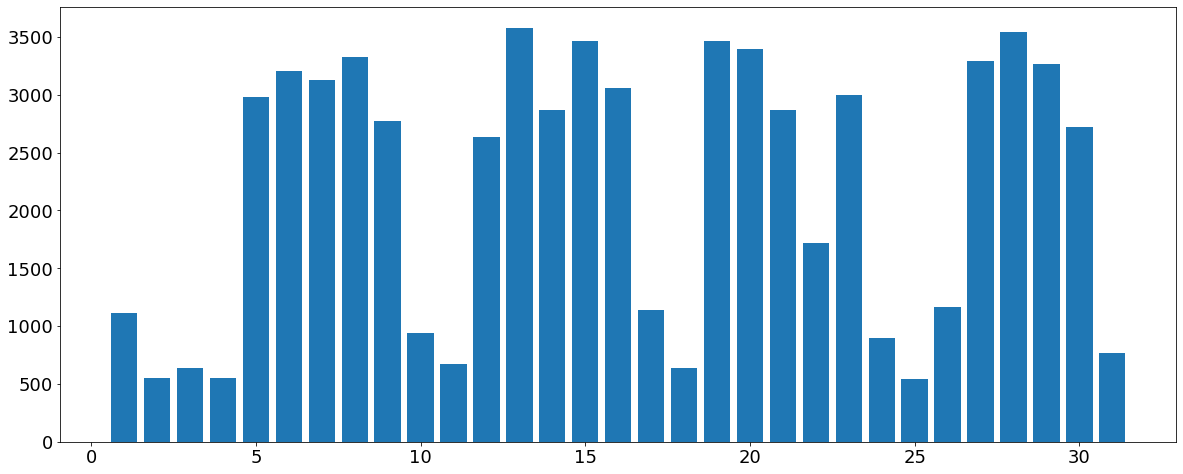

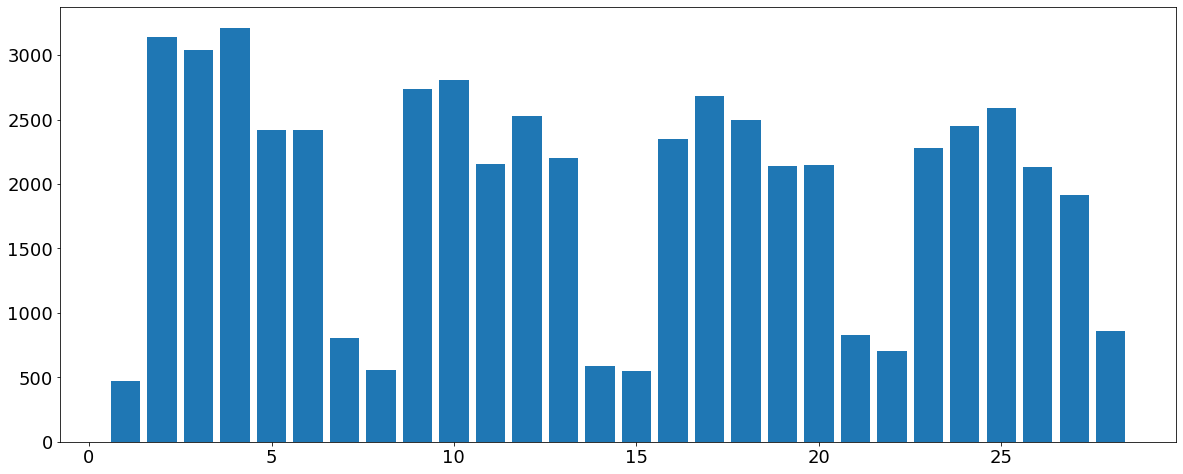

In [426]:
#Vamos plotar pra tentar identificar alguma sazonalidade ou correlação
plt.bar(np.linspace(1,31,31), dados_202101["casos_novos"])
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102["casos_novos"])
plt.show()

É possível observar, apenas no aspecto visual, que temos uma menor incidência de casos e óbitos nos finais de semana e feriados. Há uma função de autocorrelação do pandas que nos ajuda com esta tarefa (autocorrelation_plot)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

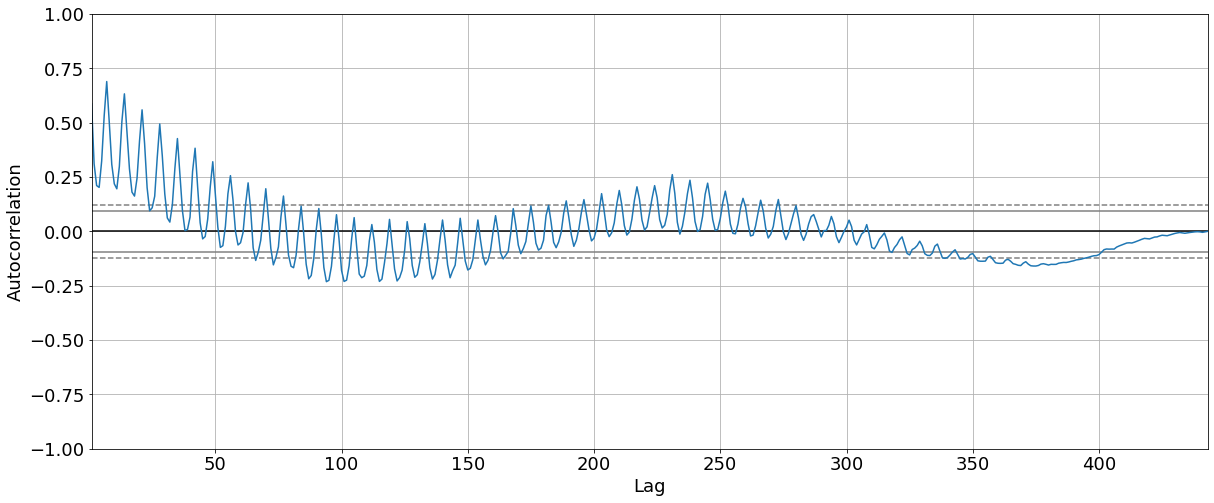

In [427]:
#autocorrelação, quanto mais perto de 0 menor é a correlação, perto de 1 é uma correlação direta e perto de -1 é uma correlação inversa
autocorrelation_plot(dados_sp["casos_novos"])

In [428]:
#vamos conparar com um dado gerado aleatoriamente
dados_sp.shape

(443, 32)

In [429]:
aleatorio = np.random.rand(443)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

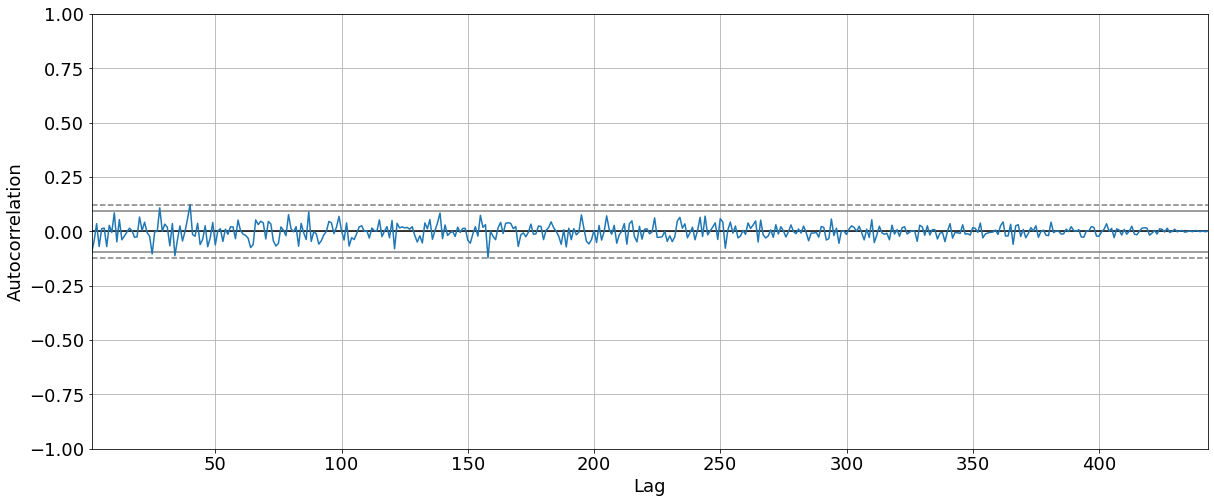

In [430]:
autocorrelation_plot(aleatorio)

### Desafio 06: Função de correlação cruzada entre óbitos e casos (verificar biblioteca statsmodels)

In [431]:
import statsmodels.tsa.stattools as smt

In [432]:
ccf_output = smt.ccf(dados_sp['casos_novos'],dados_sp['obitos_novos'],unbiased=False)
ccf_output

array([ 7.35532357e-01,  5.18634760e-01,  2.96344658e-01,  2.04628898e-01,
        2.07214651e-01,  2.90213920e-01,  4.51957258e-01,  6.00207545e-01,
        4.52122384e-01,  2.64682798e-01,  1.85317548e-01,  1.70062098e-01,
        2.28009030e-01,  3.76495285e-01,  5.66145251e-01,  4.05815122e-01,
        2.06193191e-01,  1.30927021e-01,  1.11117549e-01,  1.69294108e-01,
        3.09800477e-01,  4.97117047e-01,  3.43968943e-01,  1.56718170e-01,
        8.05545560e-02,  6.44069226e-02,  1.12441716e-01,  2.67837986e-01,
        4.10046643e-01,  2.78378225e-01,  9.19307475e-02,  3.60045975e-02,
        1.25868697e-02,  8.07235094e-02,  1.89454567e-01,  3.46591589e-01,
        2.24154286e-01,  5.41705248e-02, -1.30472999e-02, -2.02981596e-02,
        3.57795815e-02,  1.50493061e-01,  2.84268753e-01,  1.60350917e-01,
        1.74473574e-02, -4.18339503e-02, -4.77872765e-02,  7.53243770e-04,
        1.04386702e-01,  2.32021345e-01,  1.21010713e-01, -1.48623916e-02,
       -7.44126166e-02, -

## Aula04: Primeiras previsões com o Prophet

In [433]:
#vamos criar um novo dataframe porque o Prophet precisa dos dados de uma determinada maneira
df = pd.DataFrame()

In [434]:
#vamos criar uma coluna com a informação de tempo, com esse nome específico "ds"
df["ds"] = dados_sp["datahora"]

In [435]:
#vamos criar uma coluna alvo, que é o que queremos prever (no nosso caso, o npumero de casos de covid). O nome deve ser "y"
df["y"] = dados_sp["casos_novos"]

In [436]:
#vamos importar o prophet
import prophet

In [437]:
#criar o modelo de Machinne Learning do Prophet
modelo = prophet.Prophet()

In [438]:
#fit, ajuste do modelo aos nossos dados
modelo.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [439]:
#vamos visualizar a previsão

#criar um dataframe com o período desejado
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [440]:
dataframefuturo

ds
0   2020-02-25
1   2020-02-26
2   2020-02-27
3   2020-02-28
4   2020-02-29
..         ...
468 2021-06-07
469 2021-06-08
470 2021-06-09
471 2021-06-10
472 2021-06-11

[473 rows x 1 columns]

In [441]:
#fazer a previsão para o período desejado
previsao = modelo.predict(dataframefuturo)

In [442]:
previsao

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-02-25  -119.052217  -754.300896  1675.661876  -119.052217   
1   2020-02-26  -101.733359  -772.138851  1554.486016  -101.733359   
2   2020-02-27   -84.414501  -746.811703  1809.386971   -84.414501   
3   2020-02-28   -67.095643  -937.748921  1506.605192   -67.095643   
4   2020-02-29   -49.776785 -1278.924055  1163.218344   -49.776785   
..         ...          ...          ...          ...          ...   
468 2021-06-07  3420.793089  1102.523389  3504.258176  3383.757958   
469 2021-06-08  3430.816723  2801.385170  5118.763260  3391.534941   
470 2021-06-09  3440.840356  2837.800736  5203.540041  3399.105074   
471 2021-06-10  3450.863990  2898.908859  5309.888630  3405.397472   
472 2021-06-11  3460.887624  2720.978582  5019.673884  3411.747851   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    -119.052217      500.712817            500.712817            500.712817   
1    -101.733359      555.369016            555.369016            555.369016   
2     -84.414501      650.415890            650.415890            650.415890   
3     -67.095643      368.220574            368.220574            368.220574   
4     -49.776785       30.668336             30.668336             30.668336   
..           ...             ...                   ...                   ...   
468  3458.091139    -1142.907559          -1142.907559          -1142.907559   
469  3470.506355      500.712817            500.712817            500.712817   
470  3482.894752      555.369016            555.369016            555.369016   
471  3495.366747      650.415890            650.415890            650.415890   
472  3508.224856      368.220574            368.220574            368.220574   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     500.712817    500.712817    500.712817                   0.0   
1     555.369016    555.369016    555.369016                   0.0   
2     650.415890    650.415890    650.415890                   0.0   
3     368.220574    368.220574    368.220574                   0.0   
4      30.668336     30.668336     30.668336                   0.0   
..           ...           ...           ...                   ...   
468 -1142.907559  -1142.907559  -1142.907559                   0.0   
469   500.712817    500.712817    500.712817                   0.0   
470   555.369016    555.369016    555.369016                   0.0   
471   650.415890    650.415890    650.415890                   0.0   
472   368.220574    368.220574    368.220574                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0   381.660600  
1                           0.0                         0.0   453.635657  
2                           0.0                         0.0   566.001389  
3                           0.0                         0.0   301.124931  
4                           0.0                         0.0   -19.108449  
..                          ...                         ...          ...  
468                         0.0                         0.0  2277.885530  
469                         0.0                         0.0  3931.529540  
470                         0.0                         0.0  3996.209372  
471                         0.0                         0.0  4101.279880  
472                         0.0                         0.0  3829.108198  

[473 rows x 16 columns]

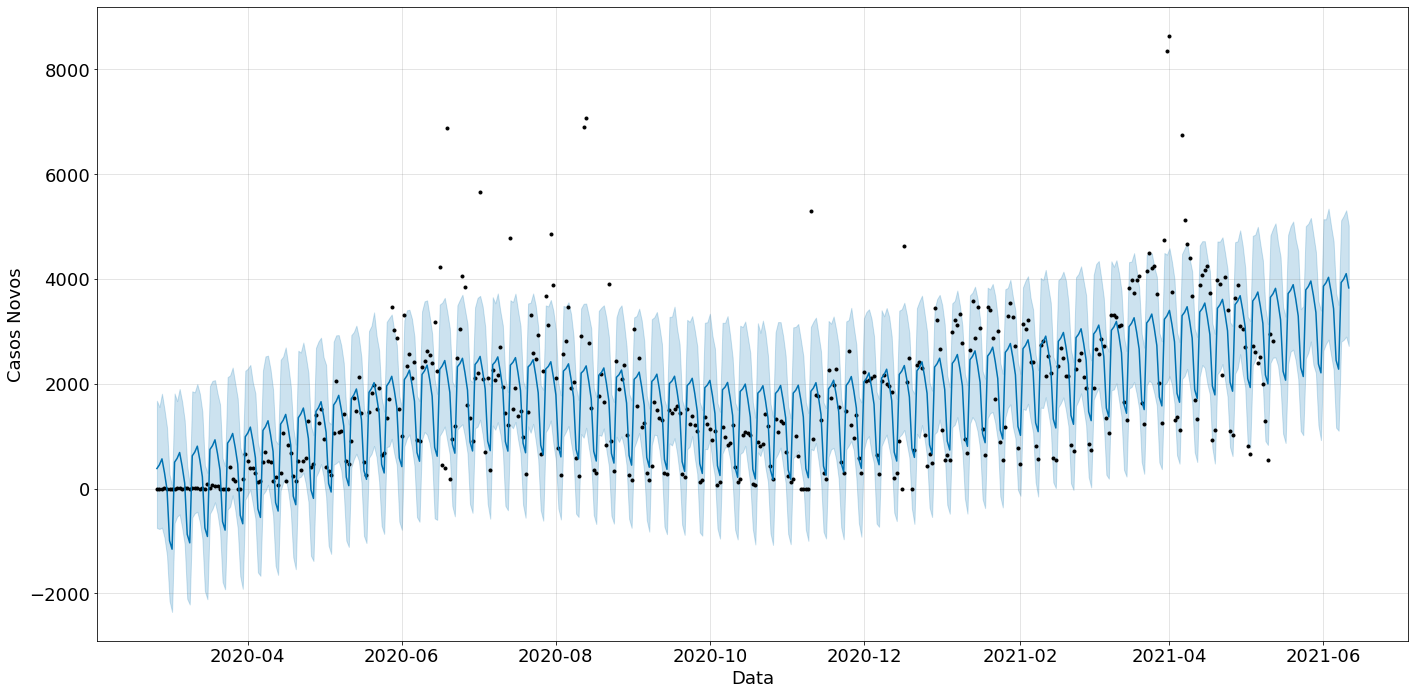

In [443]:
#a estimativa ou previsão está na coluna yhat
#o uso de ";" é para o gráfico não ser plotado suas vezes pelo prophet
modelo.plot(previsao, xlabel = "Data", ylabel = "Casos Novos", figsize=(20,10));

- os pontos pretos são os casos reais
- estamos tentando ajustar o modelo aos nossos dados
- a curva mais escura é esse ajuste do modelo aos dados, ele tem até pontos futuros
- na mensagem acima, replicada abaixo, nós vemos que o prophet desabilitou a sazonalidade anual e diária, mas ele tem uma sazonalidade semanal
> INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.<br>
> INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
- o azul mais claro é o intervalo de confiança, que é o limite de até onde o ajuste poderia estar
- é normal haver pontos fora até porque precisamos evitar o overfitting

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


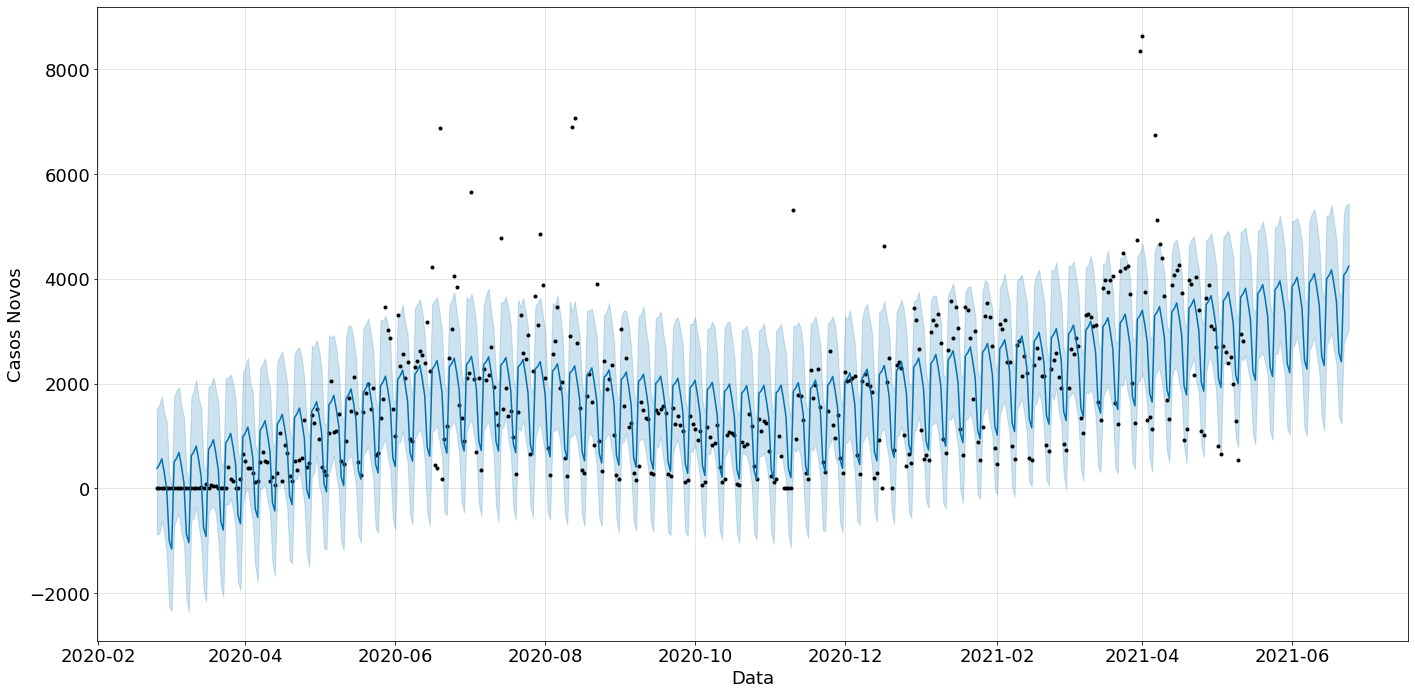

In [444]:
#vamos dividir nossos dados em dados de treino e dados de teste
#atualmente temos 443 dias no dados_sp
#vamos deixar 400 dias para treino e 43 dias para teste
df_2 = pd.DataFrame()
df_2["ds"] = dados_sp["datahora"][:400]
df_2["y"] = dados_sp["casos_novos"][:400]
modelo_2 = prophet.Prophet()
modelo_2.fit(df)
dataframefuturo_2 = modelo_2.make_future_dataframe(periods=43)
previsao_2 = modelo_2.predict(dataframefuturo_2)
modelo_2.plot(previsao_2, xlabel = "Data", ylabel = "Casos Novos", figsize=(20,10));

In [445]:
#vamos criar o dataframe com os dados de teste
df_2_teste = pd.DataFrame()
df_2_teste["ds"] = dados_sp["datahora"][400:]
df_2_teste["y"] = dados_sp["casos_novos"][400:]

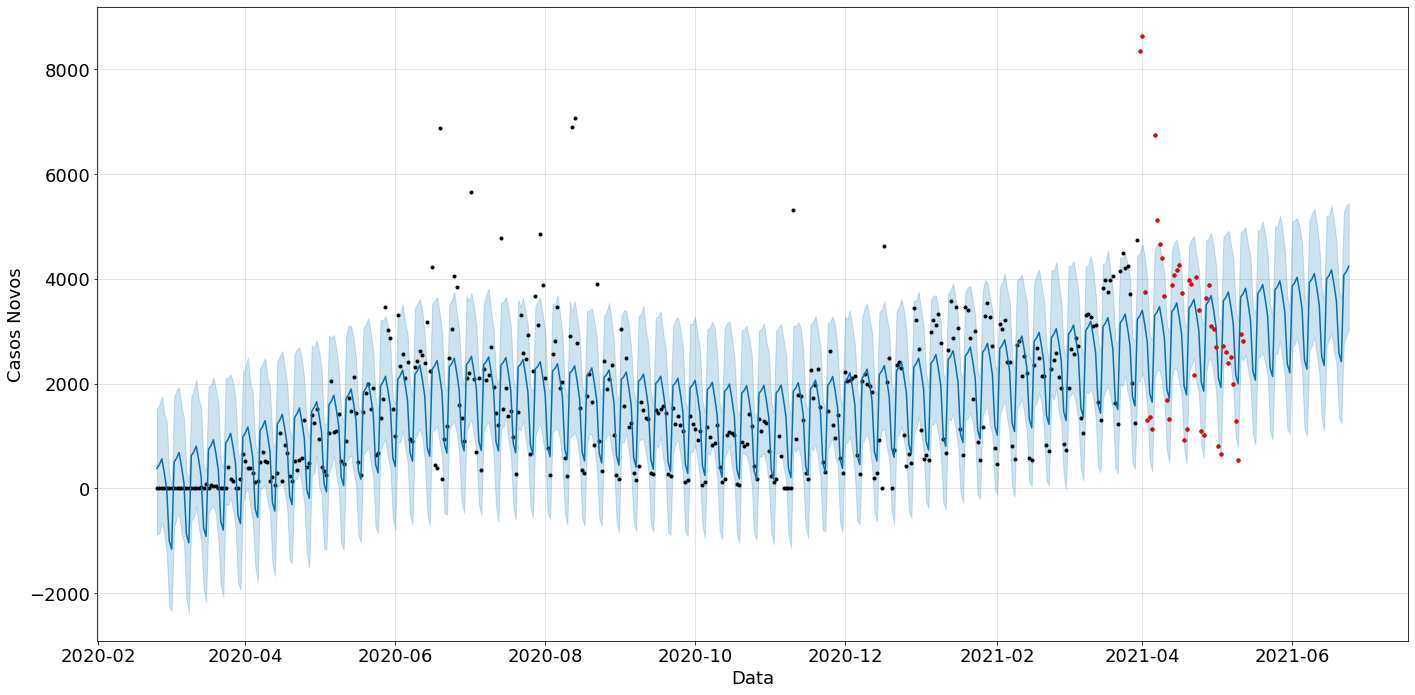

In [446]:
#vamos comparar com os dados de teste
#os pontos de teste serão plotados em vermelho
modelo_2.plot(previsao_2, xlabel = "Data", ylabel = "Casos Novos", figsize=(20,10));
plt.plot(df_2_teste["ds"], df_2_teste["y"], ".r")

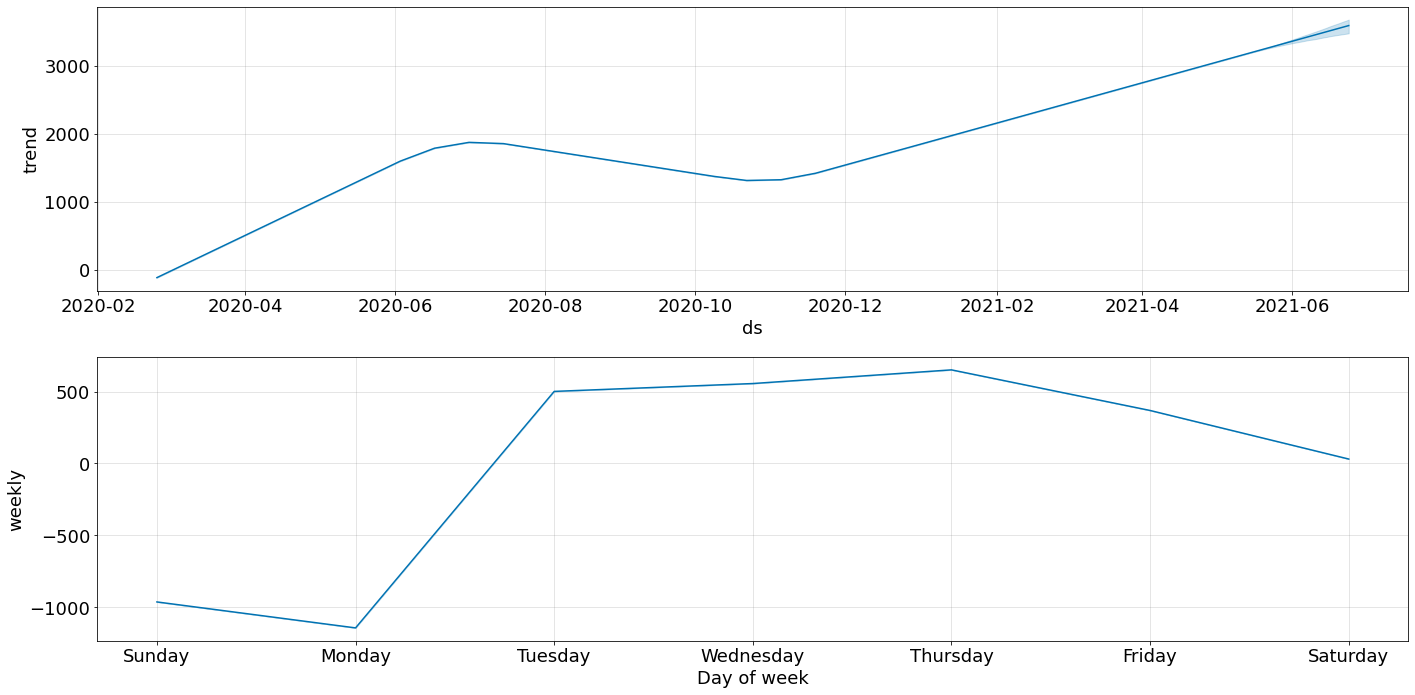

In [447]:
#vamos visualizar as informações que o prophet está extraindo dos nossos dados
#é possívell observar que o prophet automaticamente detectou uma sazonalidade semanal, no segundo gráfico
modelo_2.plot_components(previsao_2, figsize=(20,10));

### Desafios:

1. Mudar os períodos de previsão no prophet para verificar qual é o impacto na previsão
2. Explorar a documentação do prophet

## Aula 05: Mudança de tendência e changepoints

In [448]:
#Vamos começar a verificar possíveis ajuste ao nosso modelo 
#vamos importar outra funcionalidade do prophet
from prophet.plot import add_changepoints_to_plot

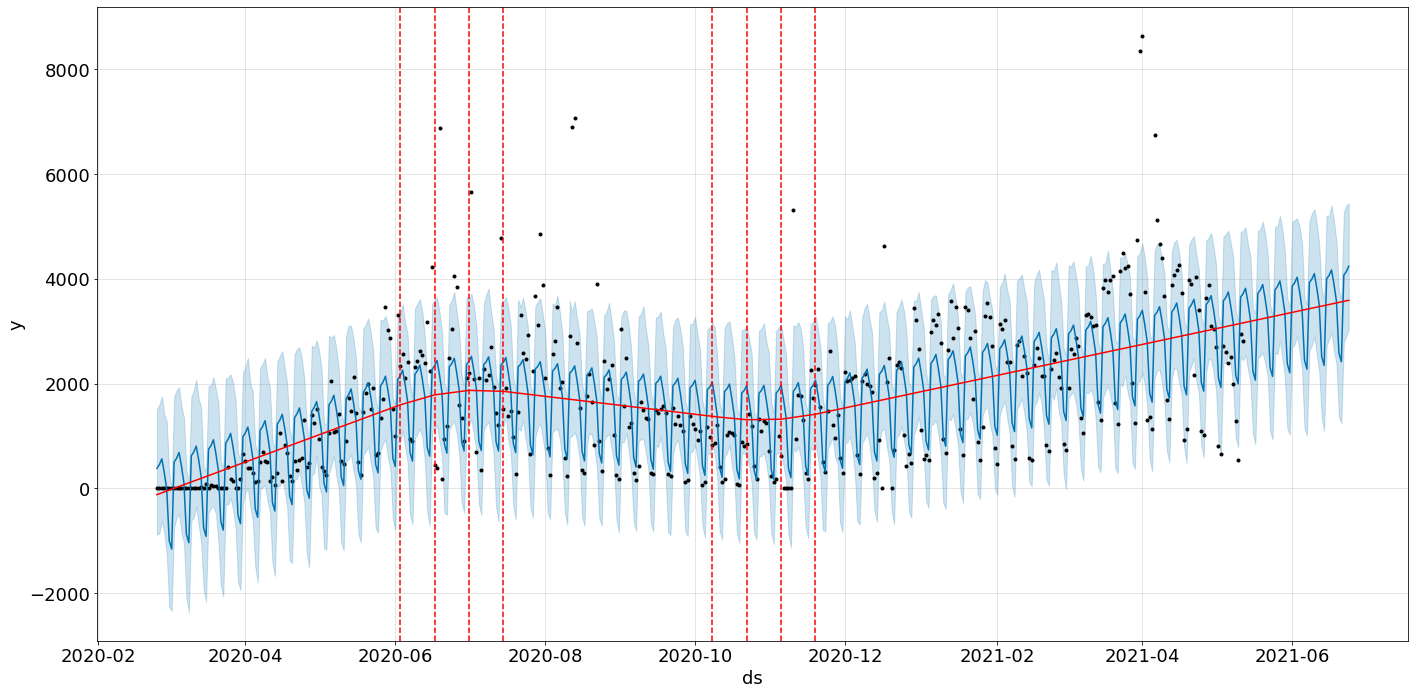

In [449]:
#vamor verificar possíveis changepoints (poontos de mudanças de tendência) onde o prophet detectará automaticamentre
fig = modelo_2.plot(previsao_2, figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), modelo_2, previsao_2)

### Desafio: Fazer a previsão para os casos acumulados (verificar se é um crescimento linear ou logístico)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


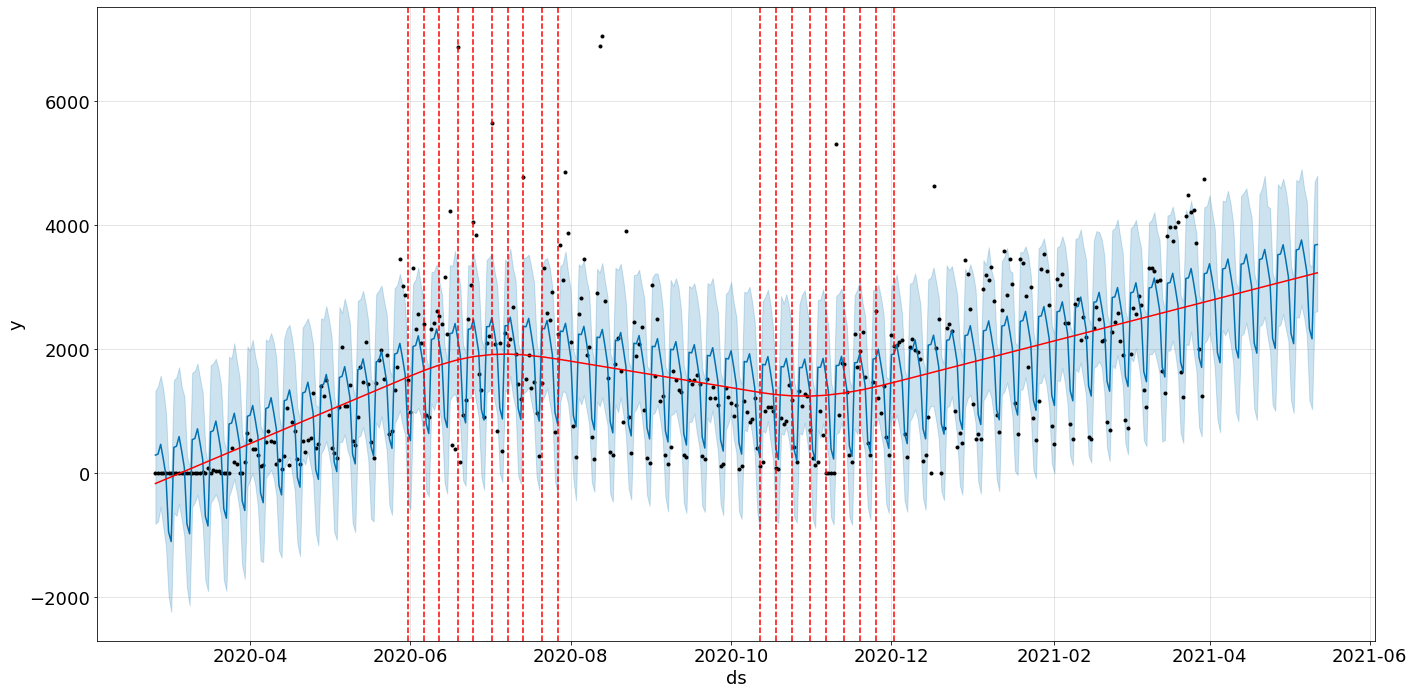

In [450]:
#vamos colocar mais changepoints no gráfico
modelo = prophet.Prophet(n_changepoints = 50)
modelo.fit(df_2)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)
fig = modelo.plot(previsao, figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


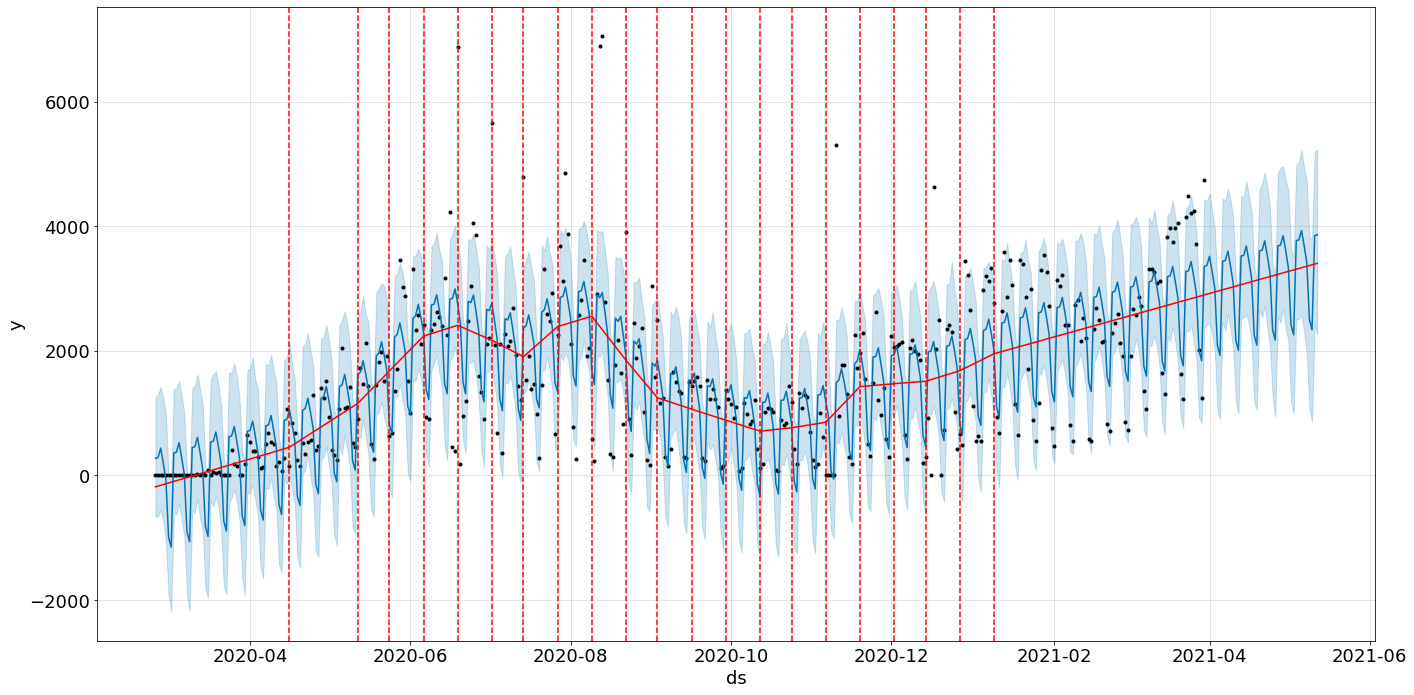

In [451]:
#vamos colocar mais um parâmetro (changepoint_prior_scale) que nos dará uma maior flexibilidade de opções nos changepoinst
modelo = prophet.Prophet(n_changepoints = 25, changepoint_prior_scale=10.0)
modelo.fit(df_2)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)
fig = modelo.plot(previsao, figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

### Desafio: identificar potenciais changepoints a partir do gráfico de barras gerados com o .diff() e comparar com os changepoints do prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


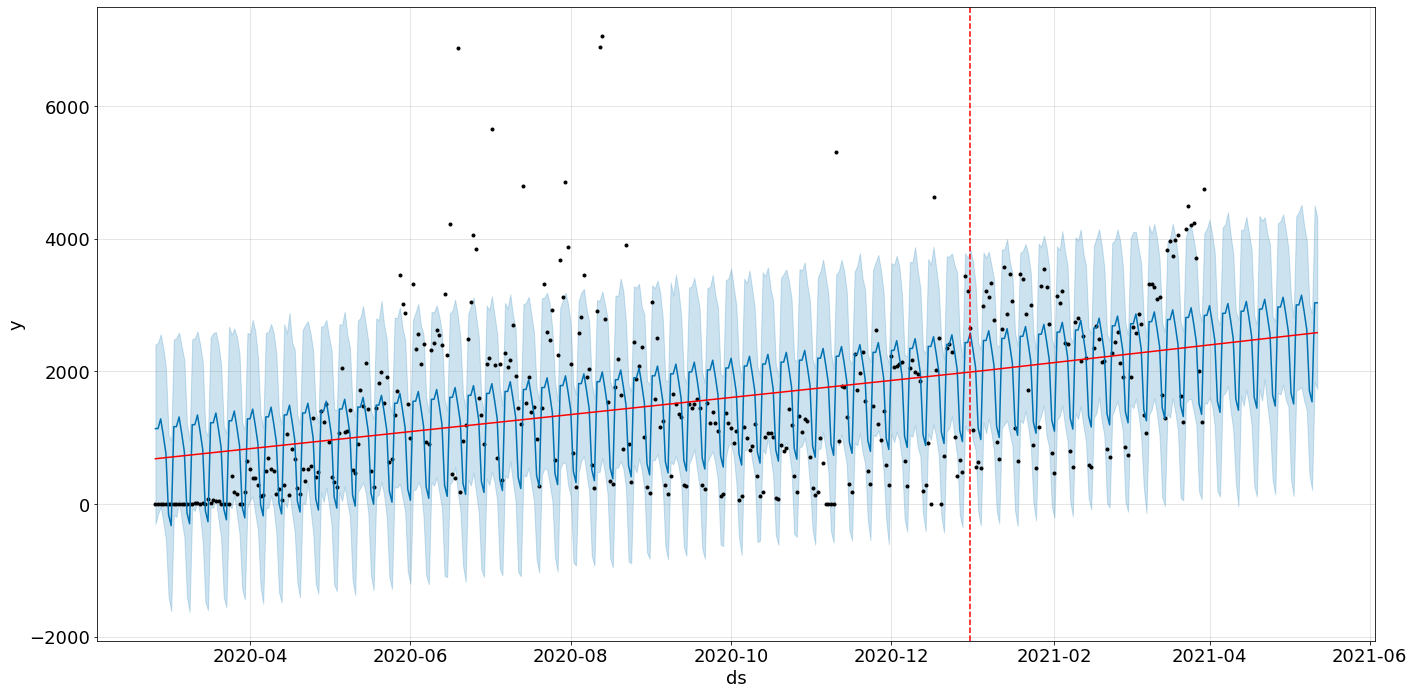

In [452]:
#vamos colocar changepoints específicos
modelo = prophet.Prophet(changepoints=["2020-12-31"])
modelo.fit(df_2)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)
fig = modelo.plot(previsao, figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

### Desafio: fazer uma função para não precisar repetir código na hora de plotar os gráficos

## Aula 06: Feriados e sazonalidades nas séries temporais

É possível verificar que há uma sazonalidade semanal, tendo o número de casos nos finais de semana sendo muito menores do que os da semana. Agora, queremos verificar se o mesmo acontece nos feriados

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


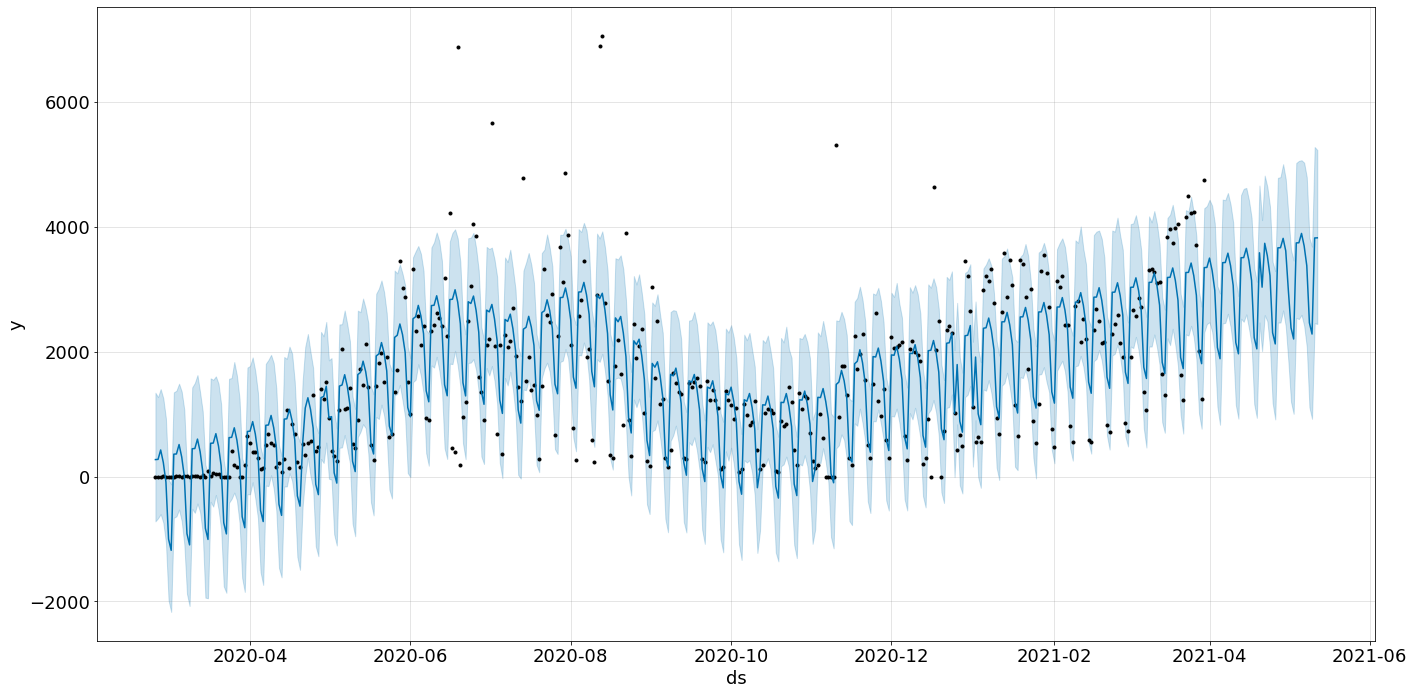

In [453]:
modelo = prophet.Prophet(changepoint_prior_scale=10)
#O código abaixo insere as datas dos feriados do Brasil
modelo.add_country_holidays(country_name="BR")
modelo.fit(df_2)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)
fig = modelo.plot(previsao, figsize=(20,10))
#a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

In [454]:
#Usando feriados especificos do municipio de SP

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]


feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))
feriados

holiday         ds
0   sp_2020 2020-02-25
1   sp_2020 2020-02-26
2   sp_2020 2020-04-10
3   sp_2020 2020-02-25
4   sp_2020 2020-02-26
5   sp_2020 2020-04-10
6   sp_2020 2020-04-21
7   sp_2020 2020-05-01
8   sp_2020 2020-05-20
9   sp_2020 2020-05-21
10  sp_2020 2020-05-22
11  sp_2020 2020-05-25
12  sp_2020 2020-06-11
13  sp_2020 2020-09-07
14  sp_2020 2020-10-12
15  sp_2020 2020-11-02
16  sp_2020 2020-11-15
17  sp_2020 2020-12-25
0   sp_2021 2021-01-01
1   sp_2021 2021-01-25
2   sp_2021 2021-02-15
3   sp_2021 2021-02-16
4   sp_2021 2021-02-17
5   sp_2021 2021-03-26
6   sp_2021 2021-03-29
7   sp_2021 2021-03-30
8   sp_2021 2021-03-31
9   sp_2021 2021-04-01
10  sp_2021 2021-04-02
11  sp_2021 2021-04-21
12  sp_2021 2021-05-01

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


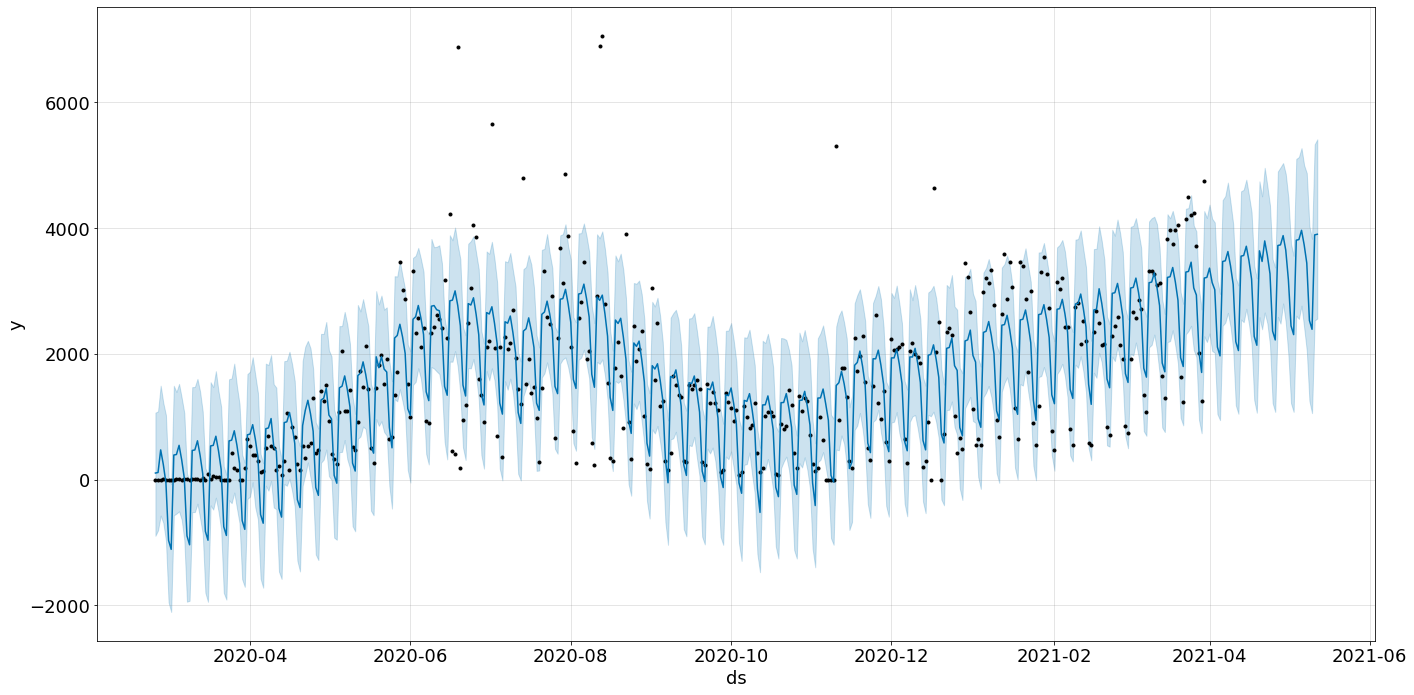

In [455]:
#Vamos plotar considerando os feriados de 2020 e 2021
modelo_feriados = prophet.Prophet(changepoint_prior_scale=10.0, holidays=feriados)
modelo_feriados.fit(df_2)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(20,10))

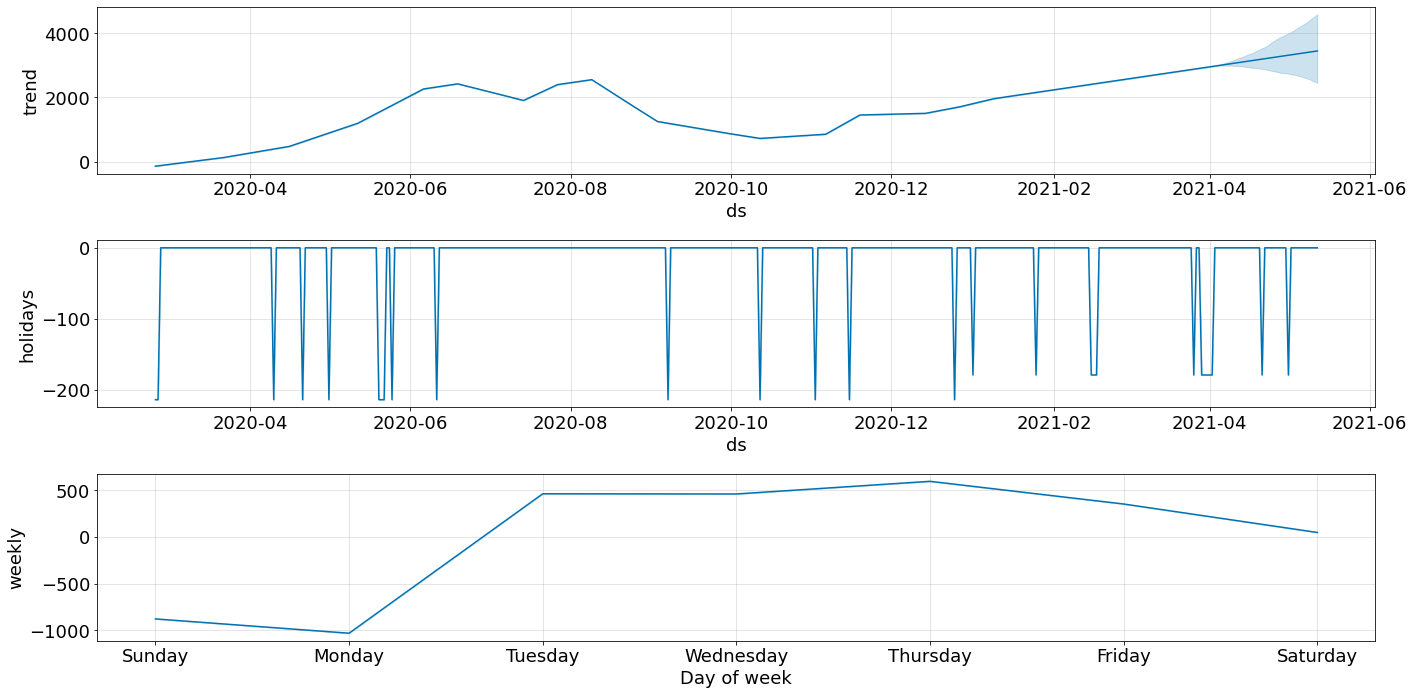

In [456]:
#Vamos plotar os componentes do prophet considerando os feriados de 2020 e 2021
modelo_feriados.plot_components(previsao, figsize=(20, 10));

## Sazonalidade

Pode ser:

- Aditiva
- Multiplicativa
 
Por padrão o prophet usa uma sazonalidade aditiva (seasonality_mode="additive")

In [457]:
#vamos nos certificar quão bom o ajuste de sazonalidade está sendo feito, medindo resultado
#Vamos utilizar a biblioteca abaixo pra fazer a medição
from sklearn.metrics import mean_absolute_error

In [458]:
#Sazonalidade aditiva
mean_absolute_error(df_2["y"], previsao["yhat"][:400])
#Quanto mais próximo de zero, melhor

536.6518476447159

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


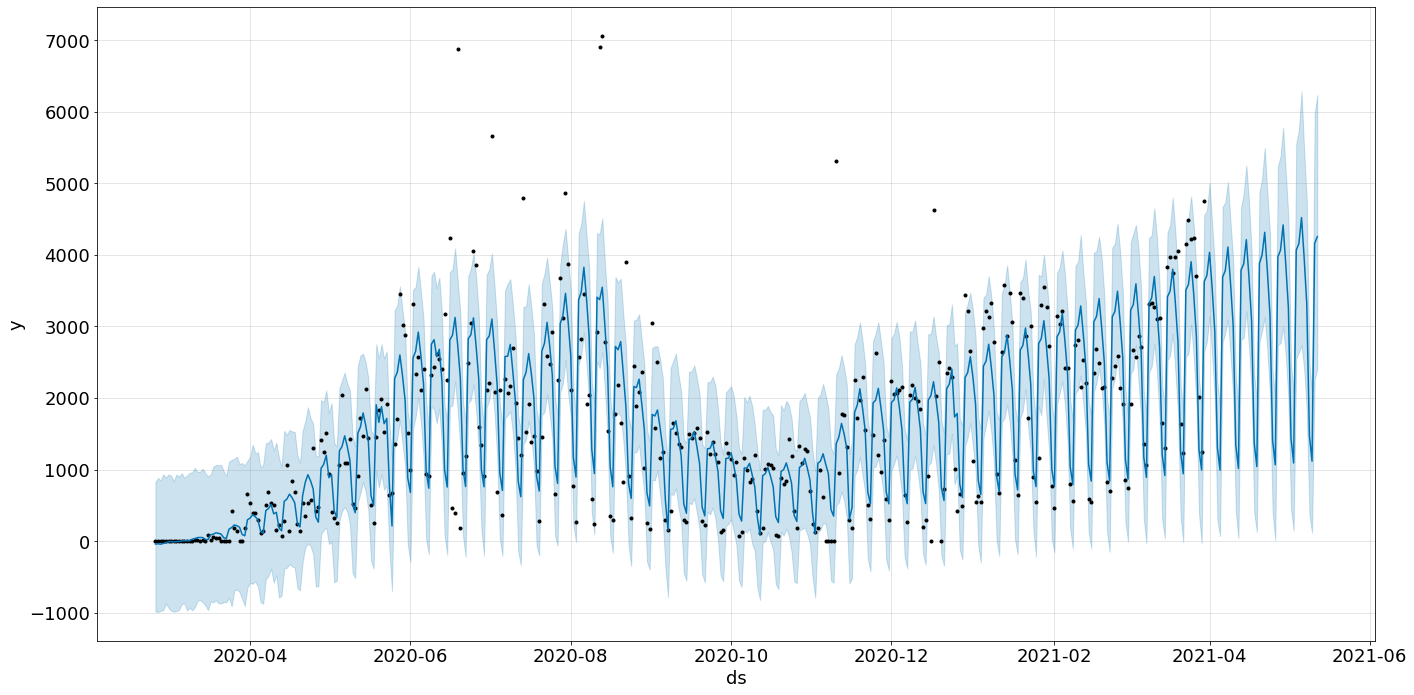

In [459]:
#Vamos gerar um novo modelo com sazonalidade multiplicativa, para depois comparar com a sazonalidade aditiva
modelo_feriados = prophet.Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode="multiplicative")
modelo_feriados.fit(df_2)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(20,10))

In [460]:
#Sazonalidade multiplicativa
mean_absolute_error(df_2["y"], previsao["yhat"][:400])
#Quanto mais próximo de zero, melhor

452.2316528704275

A sazonalidade multiplicativa se ajusta melhor aos nossos dados de treino

### Desafio: plotar os dados reais como linha, ao invés dos pontos pretos

## Aula 07: Outliers e intervalo de confiança

Como tratar outliers?

- <b>Remover:</b> vamos remover os outliers quando os pontos estiverem fora do intervalo de confiaça do gráfico gerado pelo prophet

In [461]:
#vamos remover o índice do df para facilitar nosso tratamento
novo_y = df_2.reset_index()
novo_y

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242
399  257917 2021-03-30  4748

[400 rows x 3 columns]

In [462]:
#vamos remover os outliers que estiverem fora do intervalo de confiança
sem_outliers = novo_y[(novo_y["y"] > previsao["yhat_lower"][:400]) & (novo_y["y"] < previsao["yhat_upper"][:400])]
sem_outliers

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
394  254692 2021-03-25  4214
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242

[356 rows x 3 columns]

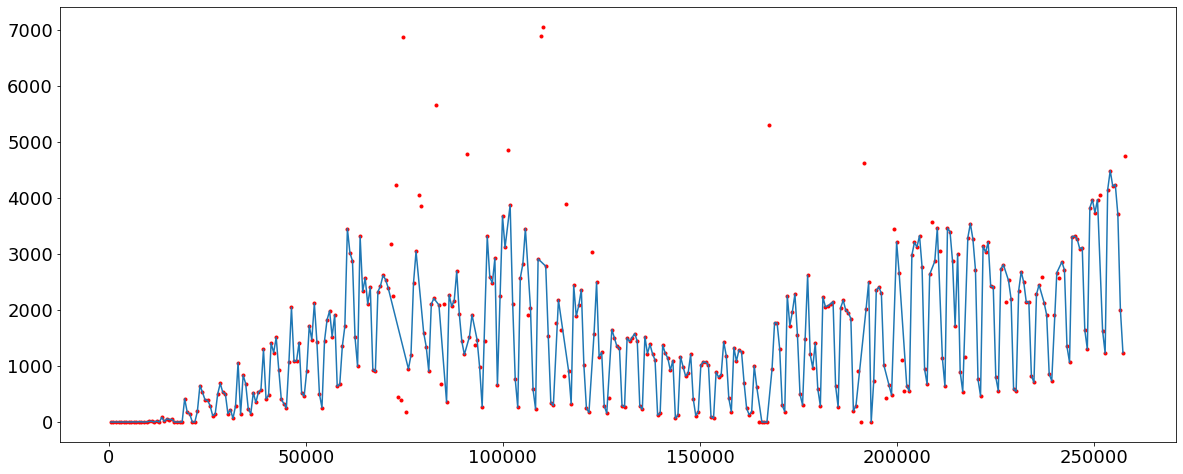

In [463]:
plt.plot(df_2.index, df_2["y"], ".r")
plt.plot(sem_outliers["index"], sem_outliers["y"])
#os outliers, que são os pontos vermelhos, estão fora do novo dataframe, que é a curva azul

In [464]:
#criar o dataframe que o prophet precisa, com coluna "ds" e "y"
df_sem_outliers = sem_outliers[["ds", "y"]]
df_sem_outliers

ds     y
0   2020-02-25     0
1   2020-02-26     0
2   2020-02-27     0
3   2020-02-28     1
4   2020-02-29     0
..         ...   ...
394 2021-03-25  4214
395 2021-03-26  4241
396 2021-03-27  3709
397 2021-03-28  2010
398 2021-03-29  1242

[356 rows x 2 columns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


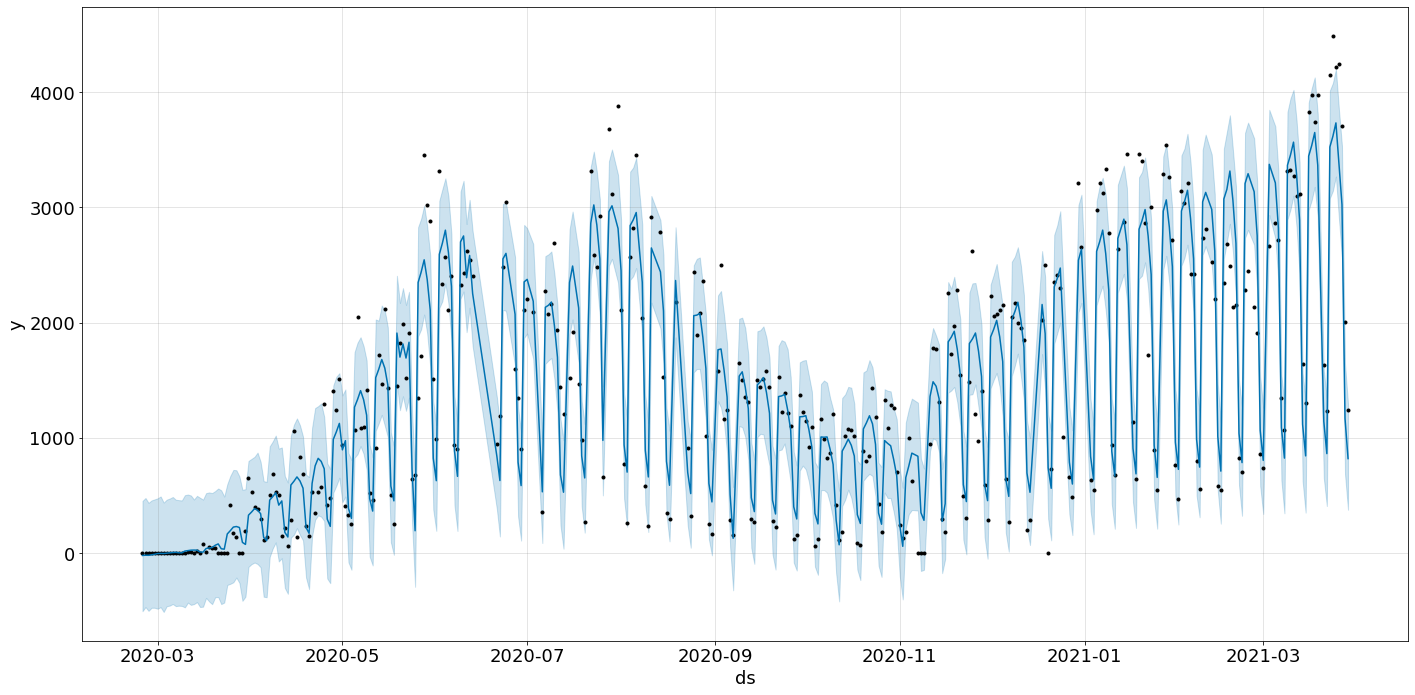

In [470]:
#Vamos gerar um novo modelo e plotar, desconsiderando a previsão futura de 43 dias
modelo_feriados = prophet.Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode="multiplicative")
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=0)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(20,10))
#ainda há alguns outliers mas temos um ajuste muito melhor agora

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


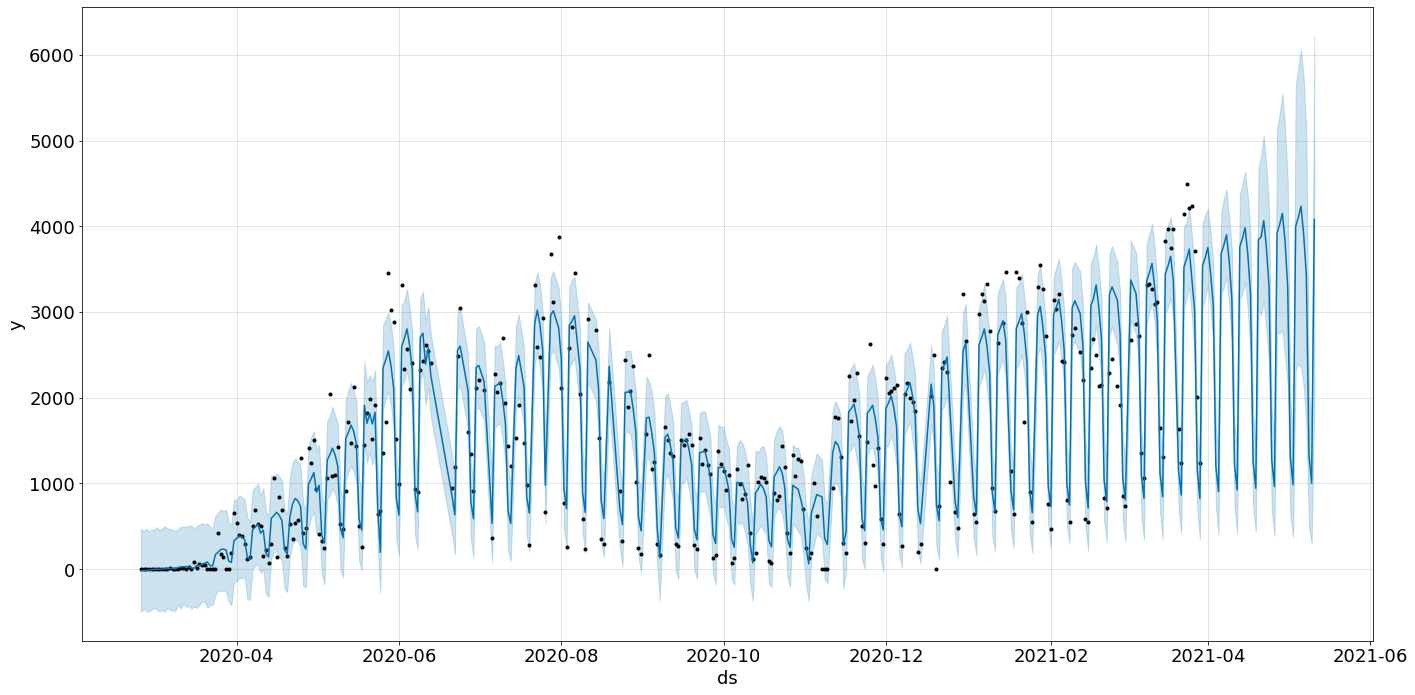

In [466]:
#Vamos gerar um novo modelo e plotar, voltando com a previsão futura de 43 dias
modelo_feriados = prophet.Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode="multiplicative")
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(20,10))

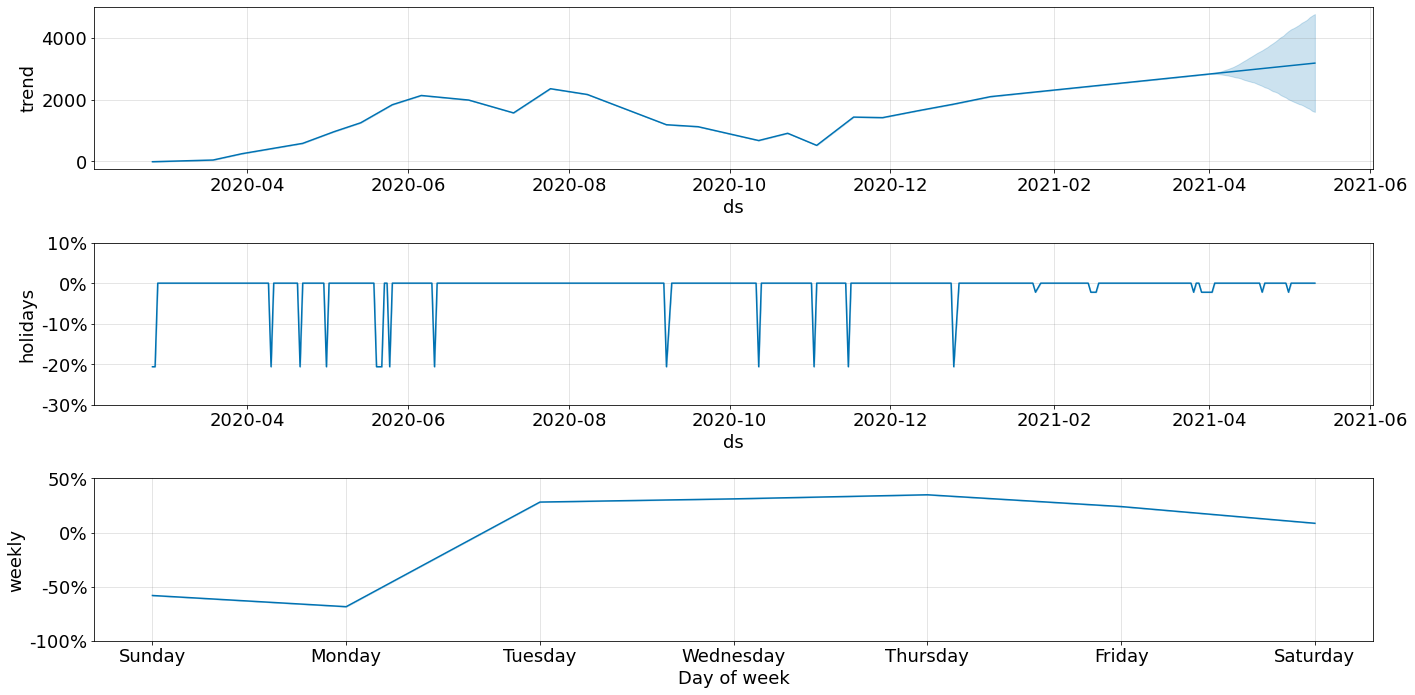

In [467]:
#vamos analisar o intervalo de confiança (no final do gráfico de tendência ("trend)"))
modelo_feriados.plot_components(previsao, figsize=(20, 10));

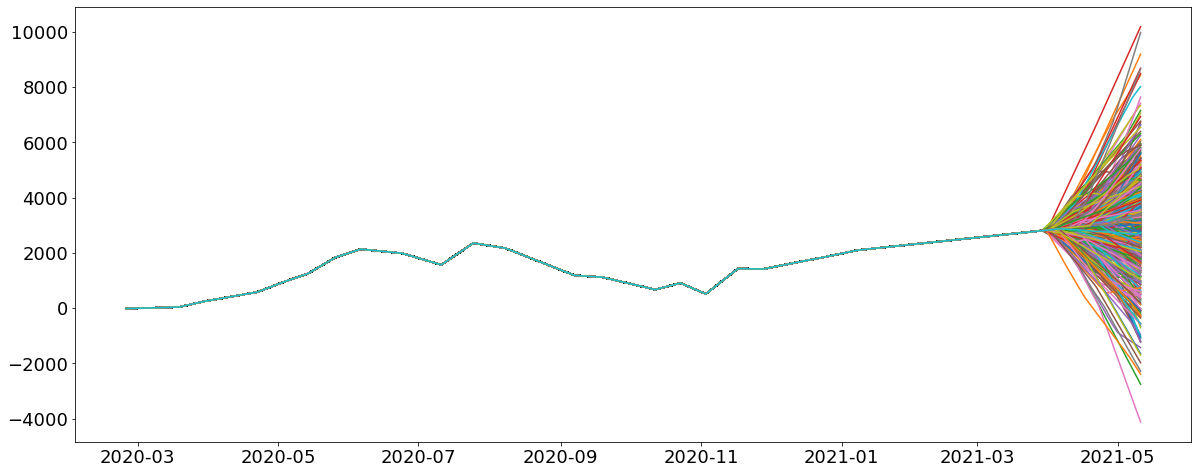

In [468]:
#as possíveis soluções para o ointervalo de confiança
amostras = modelo_feriados.predictive_samples(previsao)
plt.plot(previsao["ds"], amostras["trend"]);

### Desafio: trabalhar com o parâmetro do prophet interval_width para verificar o impacto no intervalo de confiança

In [476]:
df_2

ds     y
562    2020-02-25     0
1207   2020-02-26     0
1852   2020-02-27     0
2497   2020-02-28     1
3142   2020-02-29     0
...           ...   ...
255337 2021-03-26  4241
255982 2021-03-27  3709
256627 2021-03-28  2010
257272 2021-03-29  1242
257917 2021-03-30  4748

[400 rows x 2 columns]

### Desafio: plotar os dados de teste no último gráfico de previsão

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


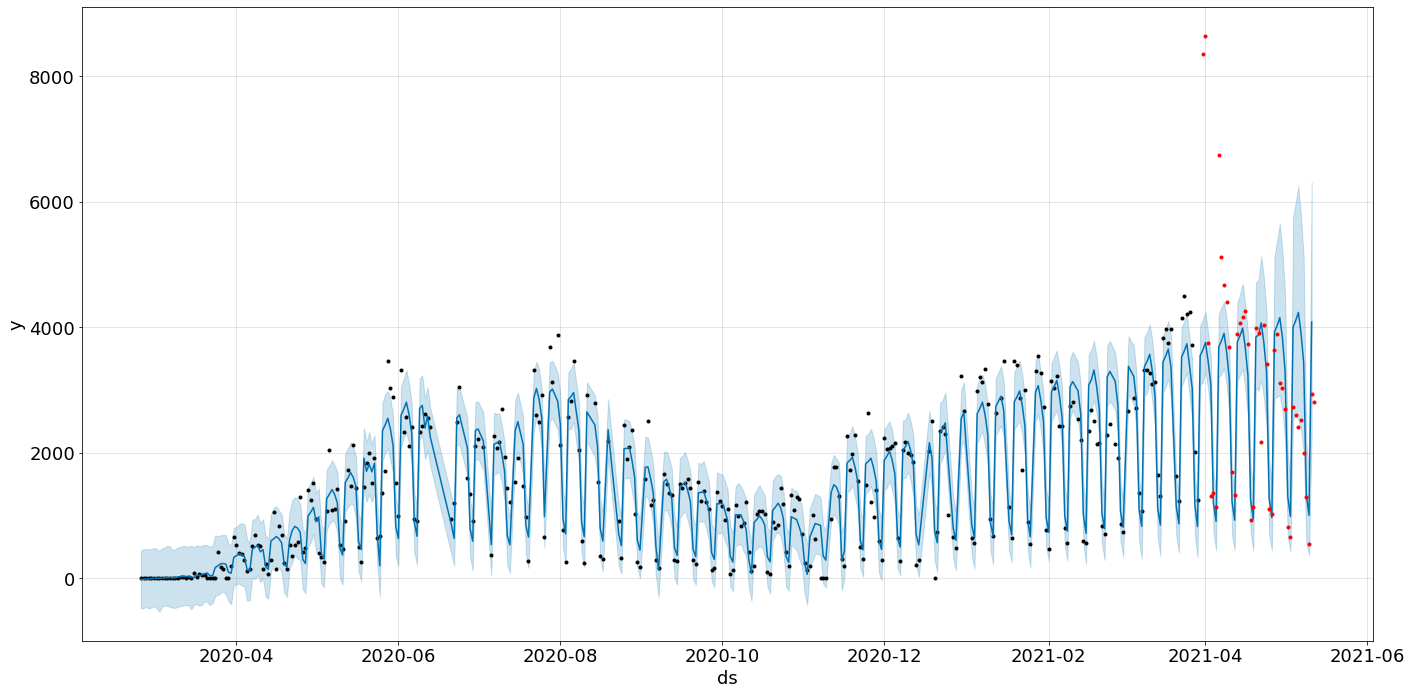

In [488]:
modelo_feriados = prophet.Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode="multiplicative")
modelo_feriados.fit(df_sem_outliers)
dataframefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo)
fig = modelo_feriados.plot(previsao, figsize=(20,10))
plt.plot(df_2_teste["ds"], df_2_teste["y"], ".r")

## Aula 08: Validação cruzada e métricas de avaliação

In [489]:
#importar a biblioteca de validação cruzada
from prophet.diagnostics import cross_validation

In [490]:
#criar um datraframe com os testes da validação cruzada
df_cv = cross_validation(modelo_feriados, initial="180 days", period = "30 days", horizon = "30 days")
df_cv

INFO:prophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0   2020-09-02  1948.774414  1487.335003  2377.738537  1579 2020-08-31
1   2020-09-03  1991.979015  1551.102220  2390.510854  2496 2020-08-31
2   2020-09-04  2008.070931  1521.608703  2435.325190  1166 2020-08-31
3   2020-09-05  1555.608413  1080.278319  2004.281781  1245 2020-08-31
4   2020-09-06   654.213449   215.611543  1099.729360   290 2020-08-31
..         ...          ...          ...          ...   ...        ...
186 2021-03-25  3090.709794  1889.092367  4451.657052  4214 2021-02-27
187 2021-03-26  2616.913830  1560.158178  3911.743103  4241 2021-02-27
188 2021-03-27  2502.972703  1323.254767  3833.065488  3709 2021-02-27
189 2021-03-28   867.766181   259.335613  1516.301402  2010 2021-02-27
190 2021-03-29   455.710906   -94.407901   976.880557  1242 2021-02-27

[191 rows x 6 columns]

Aqui vemos que foram feitas 7 previsões (7 forecasts)

In [485]:
cutoff = df_cv["cutoff"].unique()
cutoff

array(['2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-11-29T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000'], dtype='datetime64[ns]')

Aqui vemos quais foram as 7 previsões, ele não pega os primeiros 180 dias (initial="180 days"), daí ele utiliza 30 dias (period = "30 days") e pula 30 dias (horizon = "30 days")

In [491]:
#pegar a primeira janela
janela = 1
cutoff = df_cv["cutoff"].unique()[janela]
#vamos definir um corte
df_cv_cut = df_cv[df_cv["cutoff"].values == cutoff]

Text(0.5, 0, 'ds')

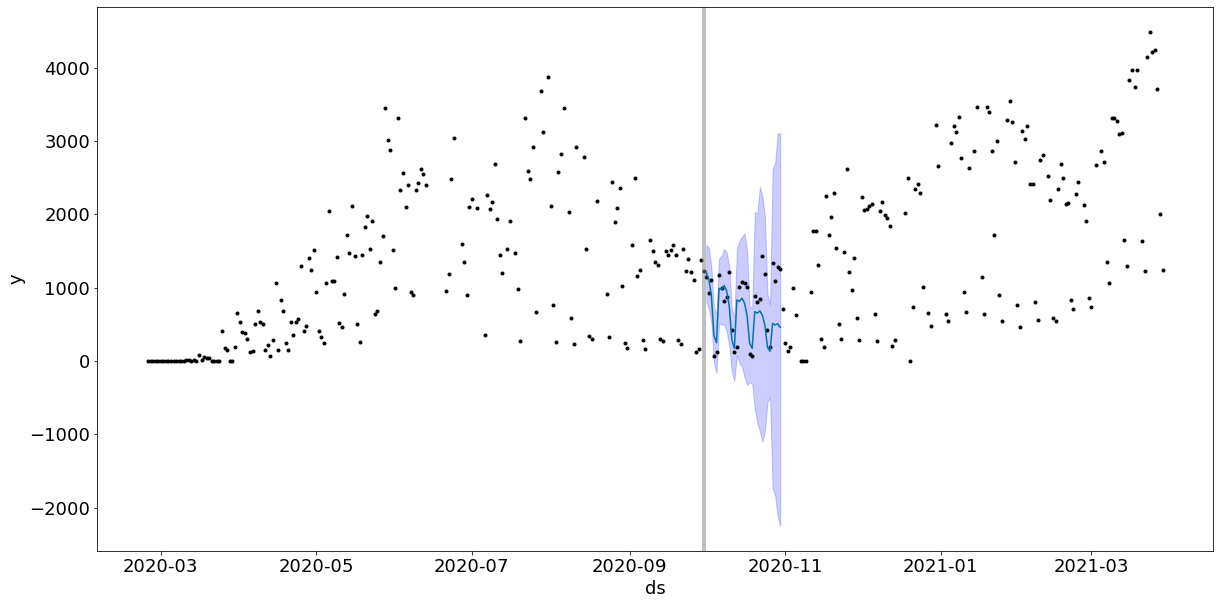

In [492]:
#plotar esse corte
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

Em azul o trecho utilizado para o teste

In [493]:
#alterar a janela
janela = 5
cutoff = df_cv["cutoff"].unique()[janela]
#vamos definir um corte
df_cv_cut = df_cv[df_cv["cutoff"].values == cutoff]

Text(0.5, 0, 'ds')

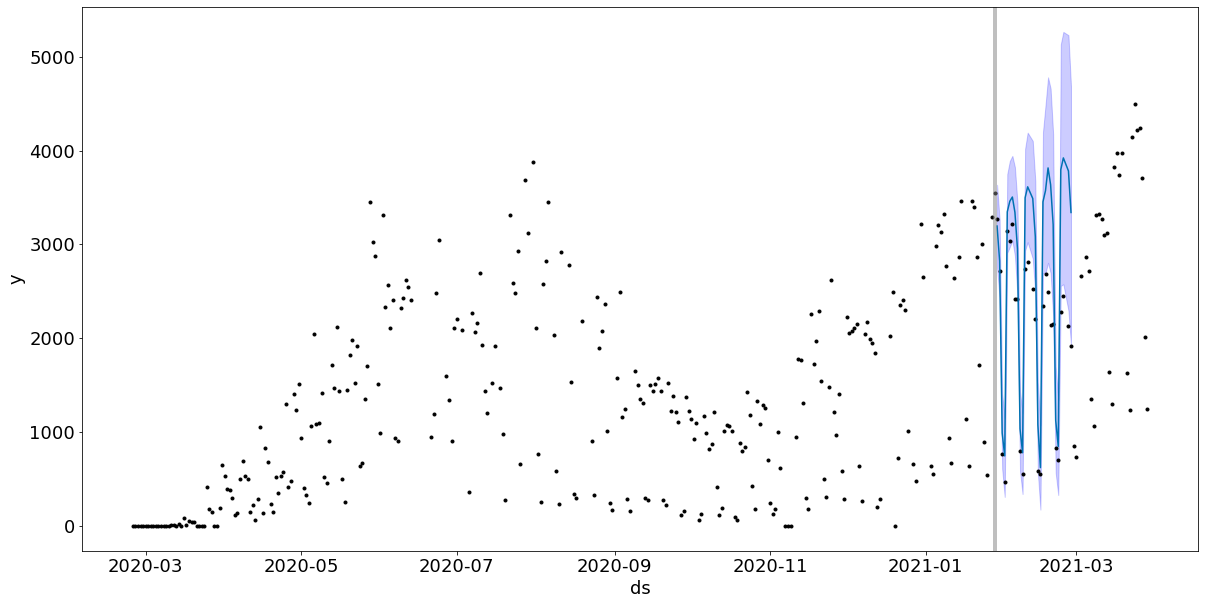

In [494]:
#plotar esse corte
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [495]:
#vamos importar mais uma biblioteca para fazer termos métricas de avaliação
from prophet.diagnostics import performance_metrics

In [496]:
df_performance = performance_metrics(df_cv)
df_performance

INFO:prophet:Skipping MAPE because y close to 0


horizon            mse        rmse         mae     mdape     smape  \
0   4 days  133833.030875  365.831971  287.283535  0.209972  0.323130   
1   5 days  124493.133201  352.835845  288.061659  0.218329  0.350642   
2   6 days  141939.789084  376.748974  311.584367  0.218329  0.382449   
3   7 days   84824.217054  291.245973  245.371332  0.128347  0.257148   
4   8 days  176679.051265  420.332073  345.428329  0.169570  0.373640   
5   9 days  165136.391536  406.369772  337.611798  0.169570  0.430514   
6  10 days  183468.996081  428.332810  375.979361  0.220902  0.500293   
7  11 days  124228.884815  352.461182  315.178251  0.211980  0.387016   
8  12 days  119432.684207  345.590342  279.552741  0.171478  0.277945   
9  13 days  174985.548837  418.312740  318.913842  0.149835  0.279507   
10 14 days  221789.667972  470.945504  364.697483  0.198270  0.353177   
11 15 days  299631.432065  547.385999  456.855017  0.379715  0.429376   
12 16 days  273692.239088  523.156037  424.876969  0.285975  0.379532   
13 17 days  278134.533128  527.384616  427.921285  0.285235  0.327570   
14 18 days  357773.211682  598.141465  447.179642  0.242756  0.343974   
15 19 days  405730.958898  636.970140  474.321344  0.241370  0.361854   
16 20 days  530835.080770  728.584299  557.800755  0.293346  0.406116   
17 21 days  594658.322188  771.140922  614.774763  0.331697  0.488452   
18 22 days  648674.532269  805.403335  642.862202  0.331697  0.495497   
19 23 days  541339.389887  735.757698  586.227802  0.458333  0.483072   
20 24 days  477717.370703  691.171014  550.630764  0.360362  0.401373   
21 25 days  453462.590617  673.396310  523.705815  0.293276  0.381793   
22 26 days  750019.630852  866.036738  634.949156  0.324127  0.393437   
23 27 days  888847.937527  942.787324  714.362760  0.370328  0.467112   
24 28 days  874604.753497  935.203055  706.141568  0.370328  0.491451   
25 29 days  751702.507730  867.007790  659.749527  0.547923  0.499353   
26 30 days  614988.753762  784.212187  594.156853  0.568276  0.492188   

    coverage  
0   0.780702  
1   0.827068  
2   0.842105  
3   0.947368  
4   0.736842  
5   0.736842  
6   0.719298  
7   0.902256  
8   0.902256  
9   0.842105  
10  0.744361  
11  0.631579  
12  0.616541  
13  0.666667  
14  0.684211  
15  0.719298  
16  0.631579  
17  0.593985  
18  0.548872  
19  0.605263  
20  0.729323  
21  0.819549  
22  0.804511  
23  0.744361  
24  0.781955  
25  0.774436  
26  0.771930

### Desafio: Buscar quais métricas se aplicam a quais casos

In [497]:
#vamos importar uma biblioteca para poder plotar as métricas
from prophet.plot import plot_cross_validation_metric

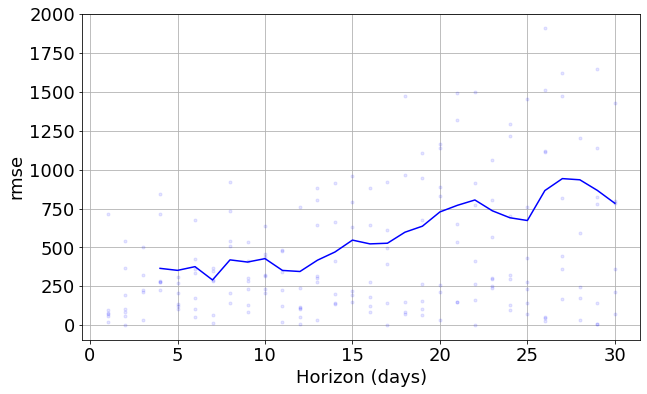

In [501]:
plot_cross_validation_metric(df_cv, metric="rmse");